In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

### Ξεκιναμε με το να τραβιξουμε τα δεδομενα απο το αρχειο μας

In [64]:
Location = r'./Data/netflix_titles.csv'

df =  pd.read_csv(Location)
df = df.dropna(subset=['type', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 'listed_in'])

df

show_id     type       title           director  \
1         s2    Movie        7:19  Jorge Michel Grau   
2         s3    Movie       23:59       Gilbert Chan   
3         s4    Movie           9        Shane Acker   
4         s5    Movie          21     Robert Luketic   
5         s6  TV Show          46        Serdar Akar   
...      ...      ...         ...                ...   
7778   s7779    Movie  Zombieland    Ruben Fleischer   
7780   s7781    Movie         Zoo       Shlok Sharma   
7781   s7782    Movie        Zoom       Peter Hewitt   
7782   s7783    Movie        Zozo        Josef Fares   
7783   s7784    Movie      Zubaan        Mozez Singh   

                                                   cast  \
1     Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2     Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3     Elijah Wood, John C. Reilly, Jennifer Connelly...   
4     Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
5     Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...   
...                                                 ...   
7778  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...   
7780  Shashank Arora, Shweta Tripathi, Rahul Kumar, ...   
7781  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...   
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   

                                                country         date_added  \
1                                                Mexico  December 23, 2016   
2                                             Singapore  December 20, 2018   
3                                         United States  November 16, 2017   
4                                         United States    January 1, 2020   
5                                                Turkey       July 1, 2017   
...                                                 ...                ...   
7778                                      United States   November 1, 2019   
7780                                              India       July 1, 2018   
7781                                      United States   January 11, 2020   
7782  Sweden, Czech Republic, United Kingdom, Denmar...   October 19, 2020   
7783                                              India      March 2, 2019   

      release_year rating  duration  \
1             2016  TV-MA    93 min   
2             2011      R    78 min   
3             2009  PG-13    80 min   
4             2008  PG-13   123 min   
5             2016  TV-MA  1 Season   
...            ...    ...       ...   
7778          2009      R    88 min   
7780          2018  TV-MA    94 min   
7781          2006     PG    88 min   
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   

                                              listed_in  \
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
5       International TV Shows, TV Dramas, TV Mysteries   
...                                                 ...   
7778                            Comedies, Horror Movies   
7780   Dramas, Independent Movies, International Movies   
7781                 Children & Family Movies, Comedies   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   

                                            description  
1     After a devastating earthquake hits Mexico Cit...  
2     When an army recruit is found dead, his fellow...  
3     In a postapocalyptic world, rag-doll robots hi...  
4     A brilliant group of students become card-coun...  
5     A genetics professor experiments with a treatm...  
...                                                 ...  
7778  Looking to survive in a world taken over by zo...  
7780  A drug dealer starts having doubts abo

### Ερωτημα 1

In [65]:
df1 = df.groupby('type', as_index=False).count()
df1 = df1[["type", "show_id"]]
df1.columns = ["Type", "Amount"]
df1

Type  Amount
0    Movie    4673
1  TV Show     135

### Ερωτημα 2

In [66]:
df2 = df.copy()
df2['date_added'] = pd.to_datetime(df2['date_added'], dayfirst=True)
df2['date_added'] = pd.DatetimeIndex(df2['date_added']).year
df2 = df2.sort_values('date_added')

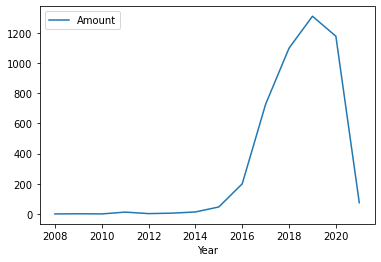

In [67]:
Movies = df2[df2["type"] == 'Movie']
Movies = Movies.groupby(["date_added"], as_index=False).count()
Movies = Movies[["date_added", "show_id"]]
Movies.columns = ["Year", "Amount"]

Movies.plot(x='Year', y='Amount', kind='line')
plt.show()

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

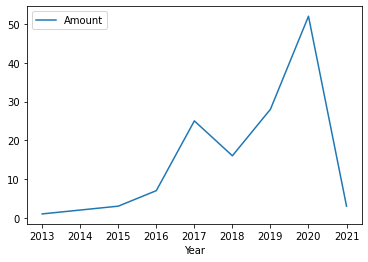

In [68]:
TV_Shows = df2[df2["type"] == 'TV Show']
TV_Shows = TV_Shows.groupby(["date_added"], as_index=False).count()
TV_Shows = TV_Shows[["date_added","show_id"]]
TV_Shows.columns = ["Year", "Amount"]

TV_Shows.plot(x='Year', y="Amount",kind='line')
plt.plot

### Ερωτημα 3

In [69]:
df['country'].value_counts().head(1)

United States    1653
Name: country, dtype: int64

### Ερωτημα 4

In [70]:
df4 = df.copy()
country4 = 'United States'

# df.columns = df.columns.str.strip()

# den einai teliomeno

* sto Movies vgazei duplicates des to
* pes oti thn metavliti country thn alazeis gia na deis ti 8es 

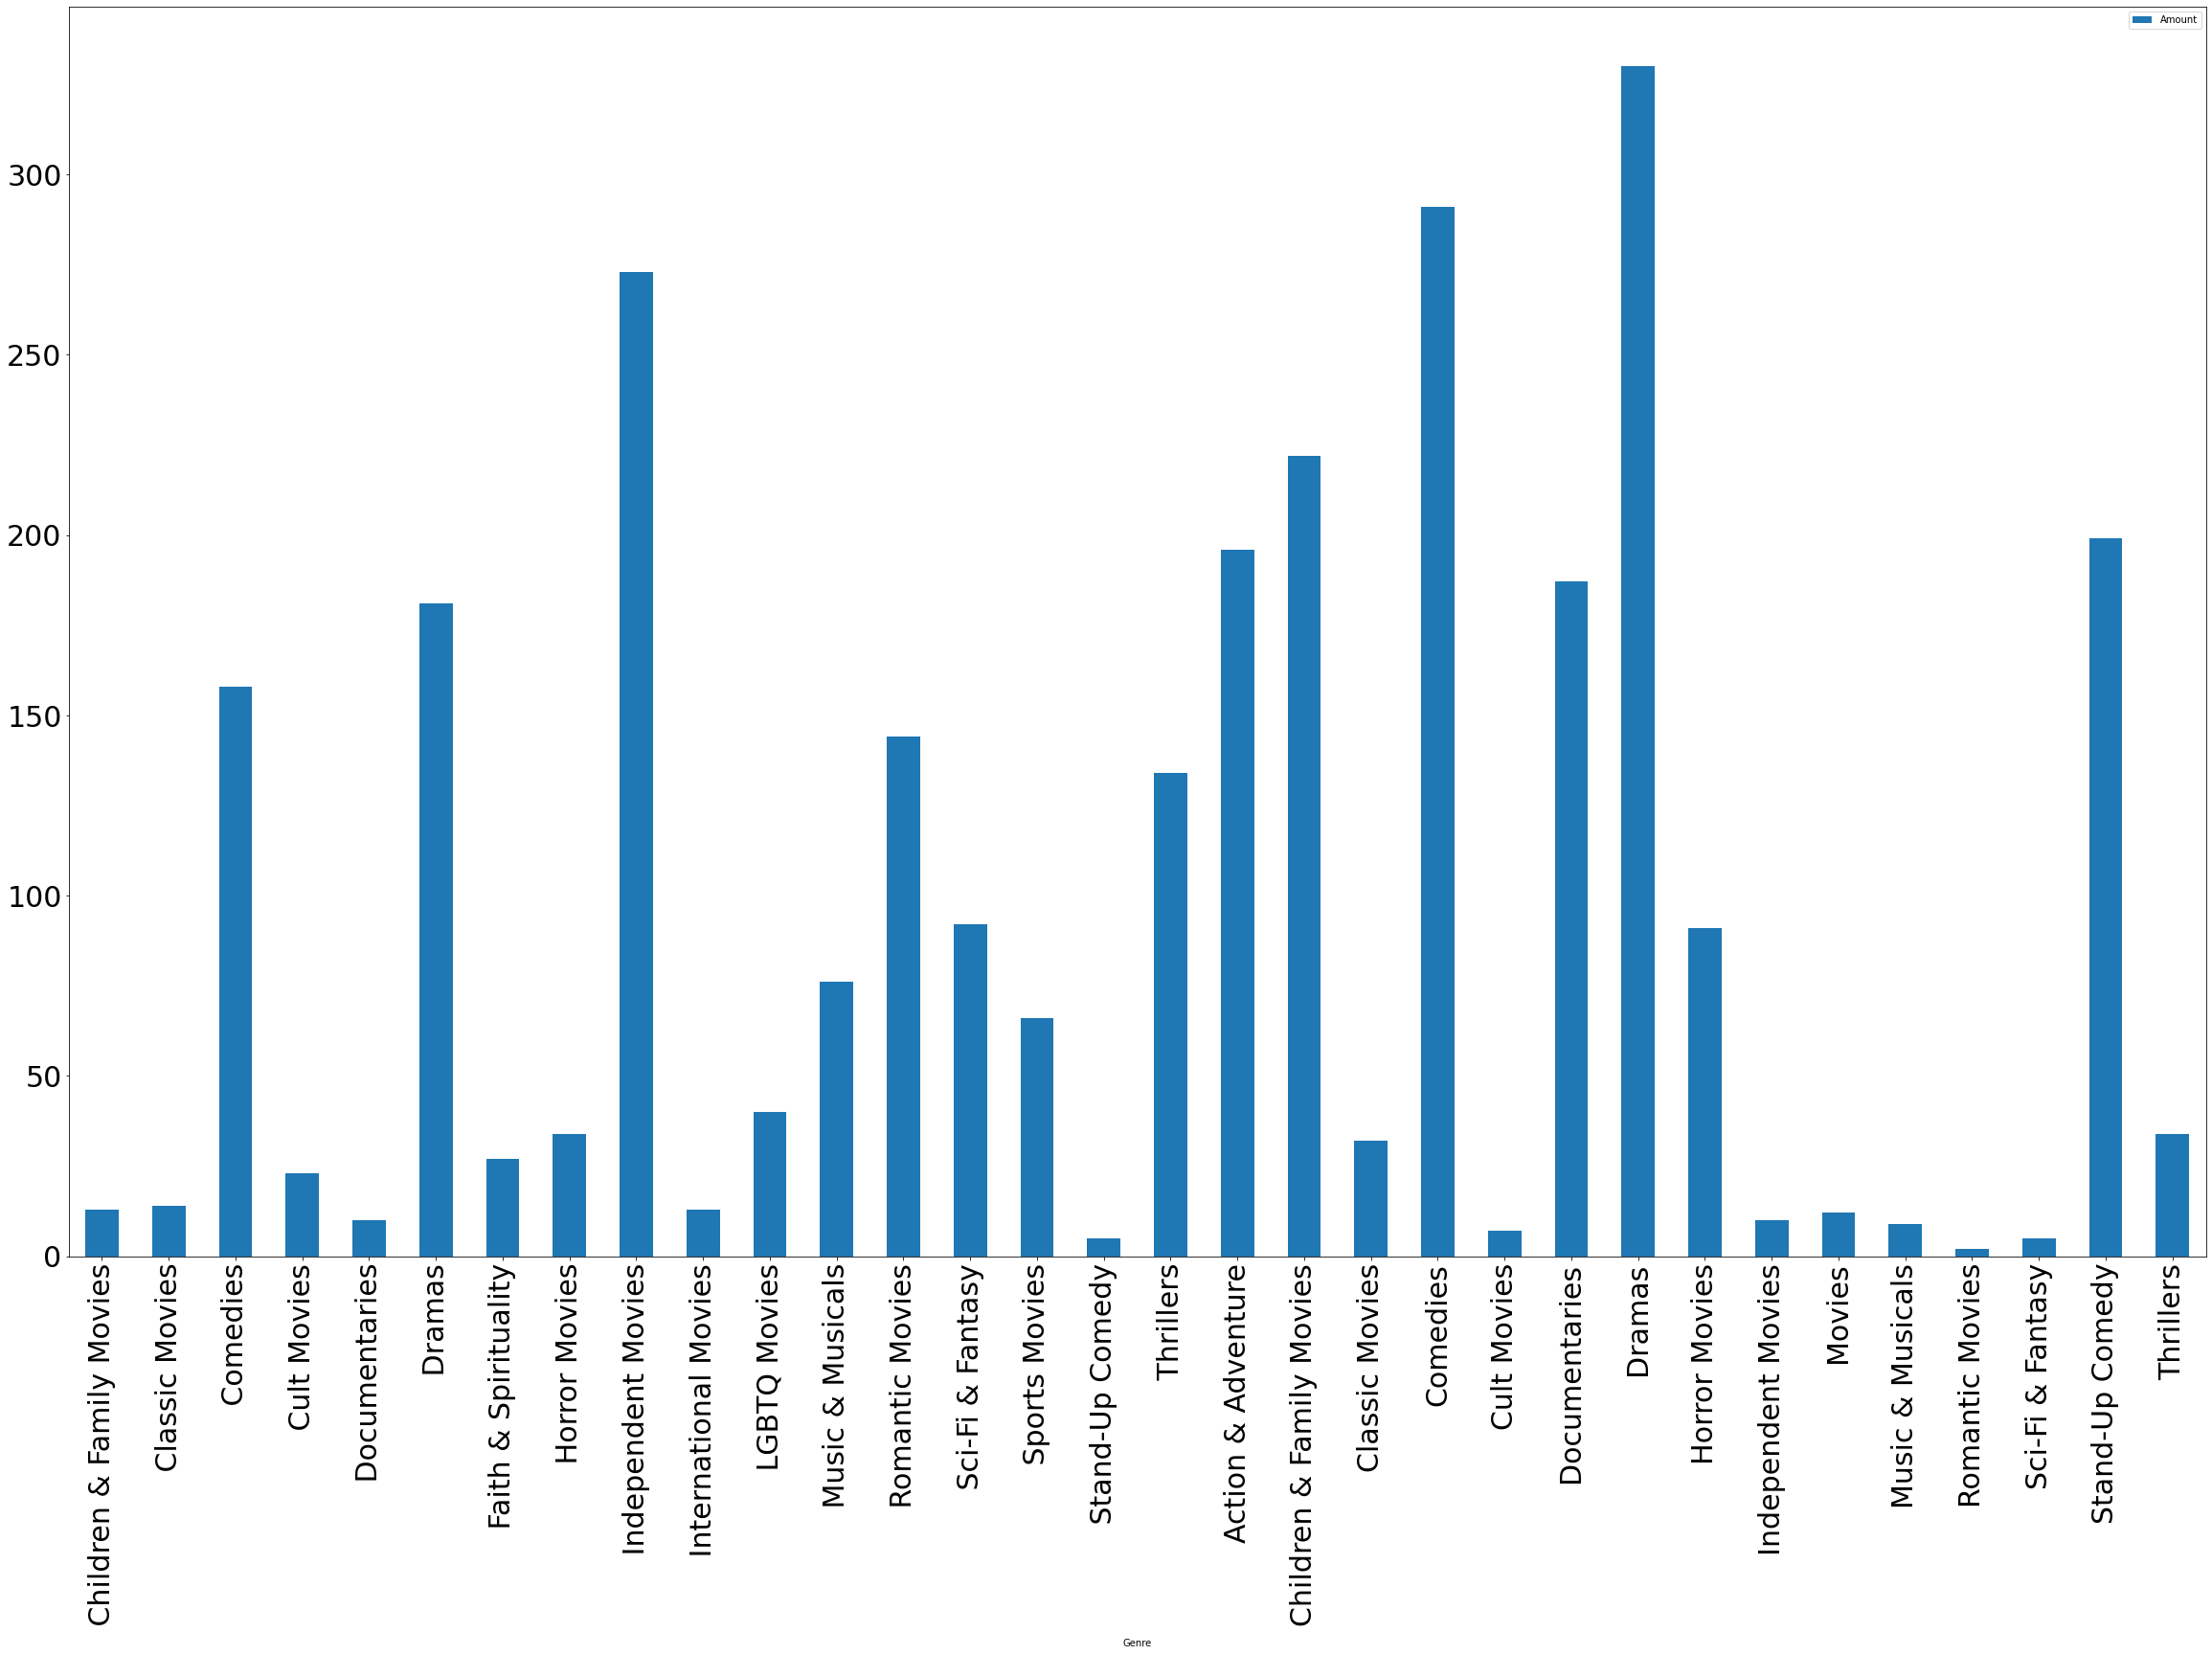

In [71]:
Movies4 = df4[df4['type'] == 'Movie']
Movies4 = Movies4[Movies4['country'] == country4]
# Movies4['listed_in'] = Movies4['listed_in'].str.strip()
# theloume mono listed_in



Movies4 = Movies4.groupby(["listed_in"], as_index=False).count()
Movies4 = Movies4[['listed_in', 'show_id']]
Movies4.columns = ['Genre', 'Amount']
Movies4 = Movies4.reset_index()
Movies4['Genre'] = Movies4['Genre'].str.split(',')


Movies4 = (Movies4
 .set_index(['index','Amount'])['Genre']
 .apply(pd.Series)
 .stack()
 .reset_index()
 .drop('level_2', axis=1)
 .rename(columns={0:'Genre'}))


# Movies4['Genre'] = Movies4['Genre'].str.split('&')

    
# Movies4 = (Movies4
#  .set_index(['index','Amount'])['Genre']
#  .apply(pd.Series)
#  .stack()
#  .reset_index()
#  .drop('level_2', axis=1)
#  .rename(columns={0:'Genre'}))

Movies4 = Movies4.groupby(['Genre'], as_index=False).sum()

Movies4.plot(x ='Genre', y='Amount', kind = 'bar', figsize=(40,24), fontsize=30)
plt.show()

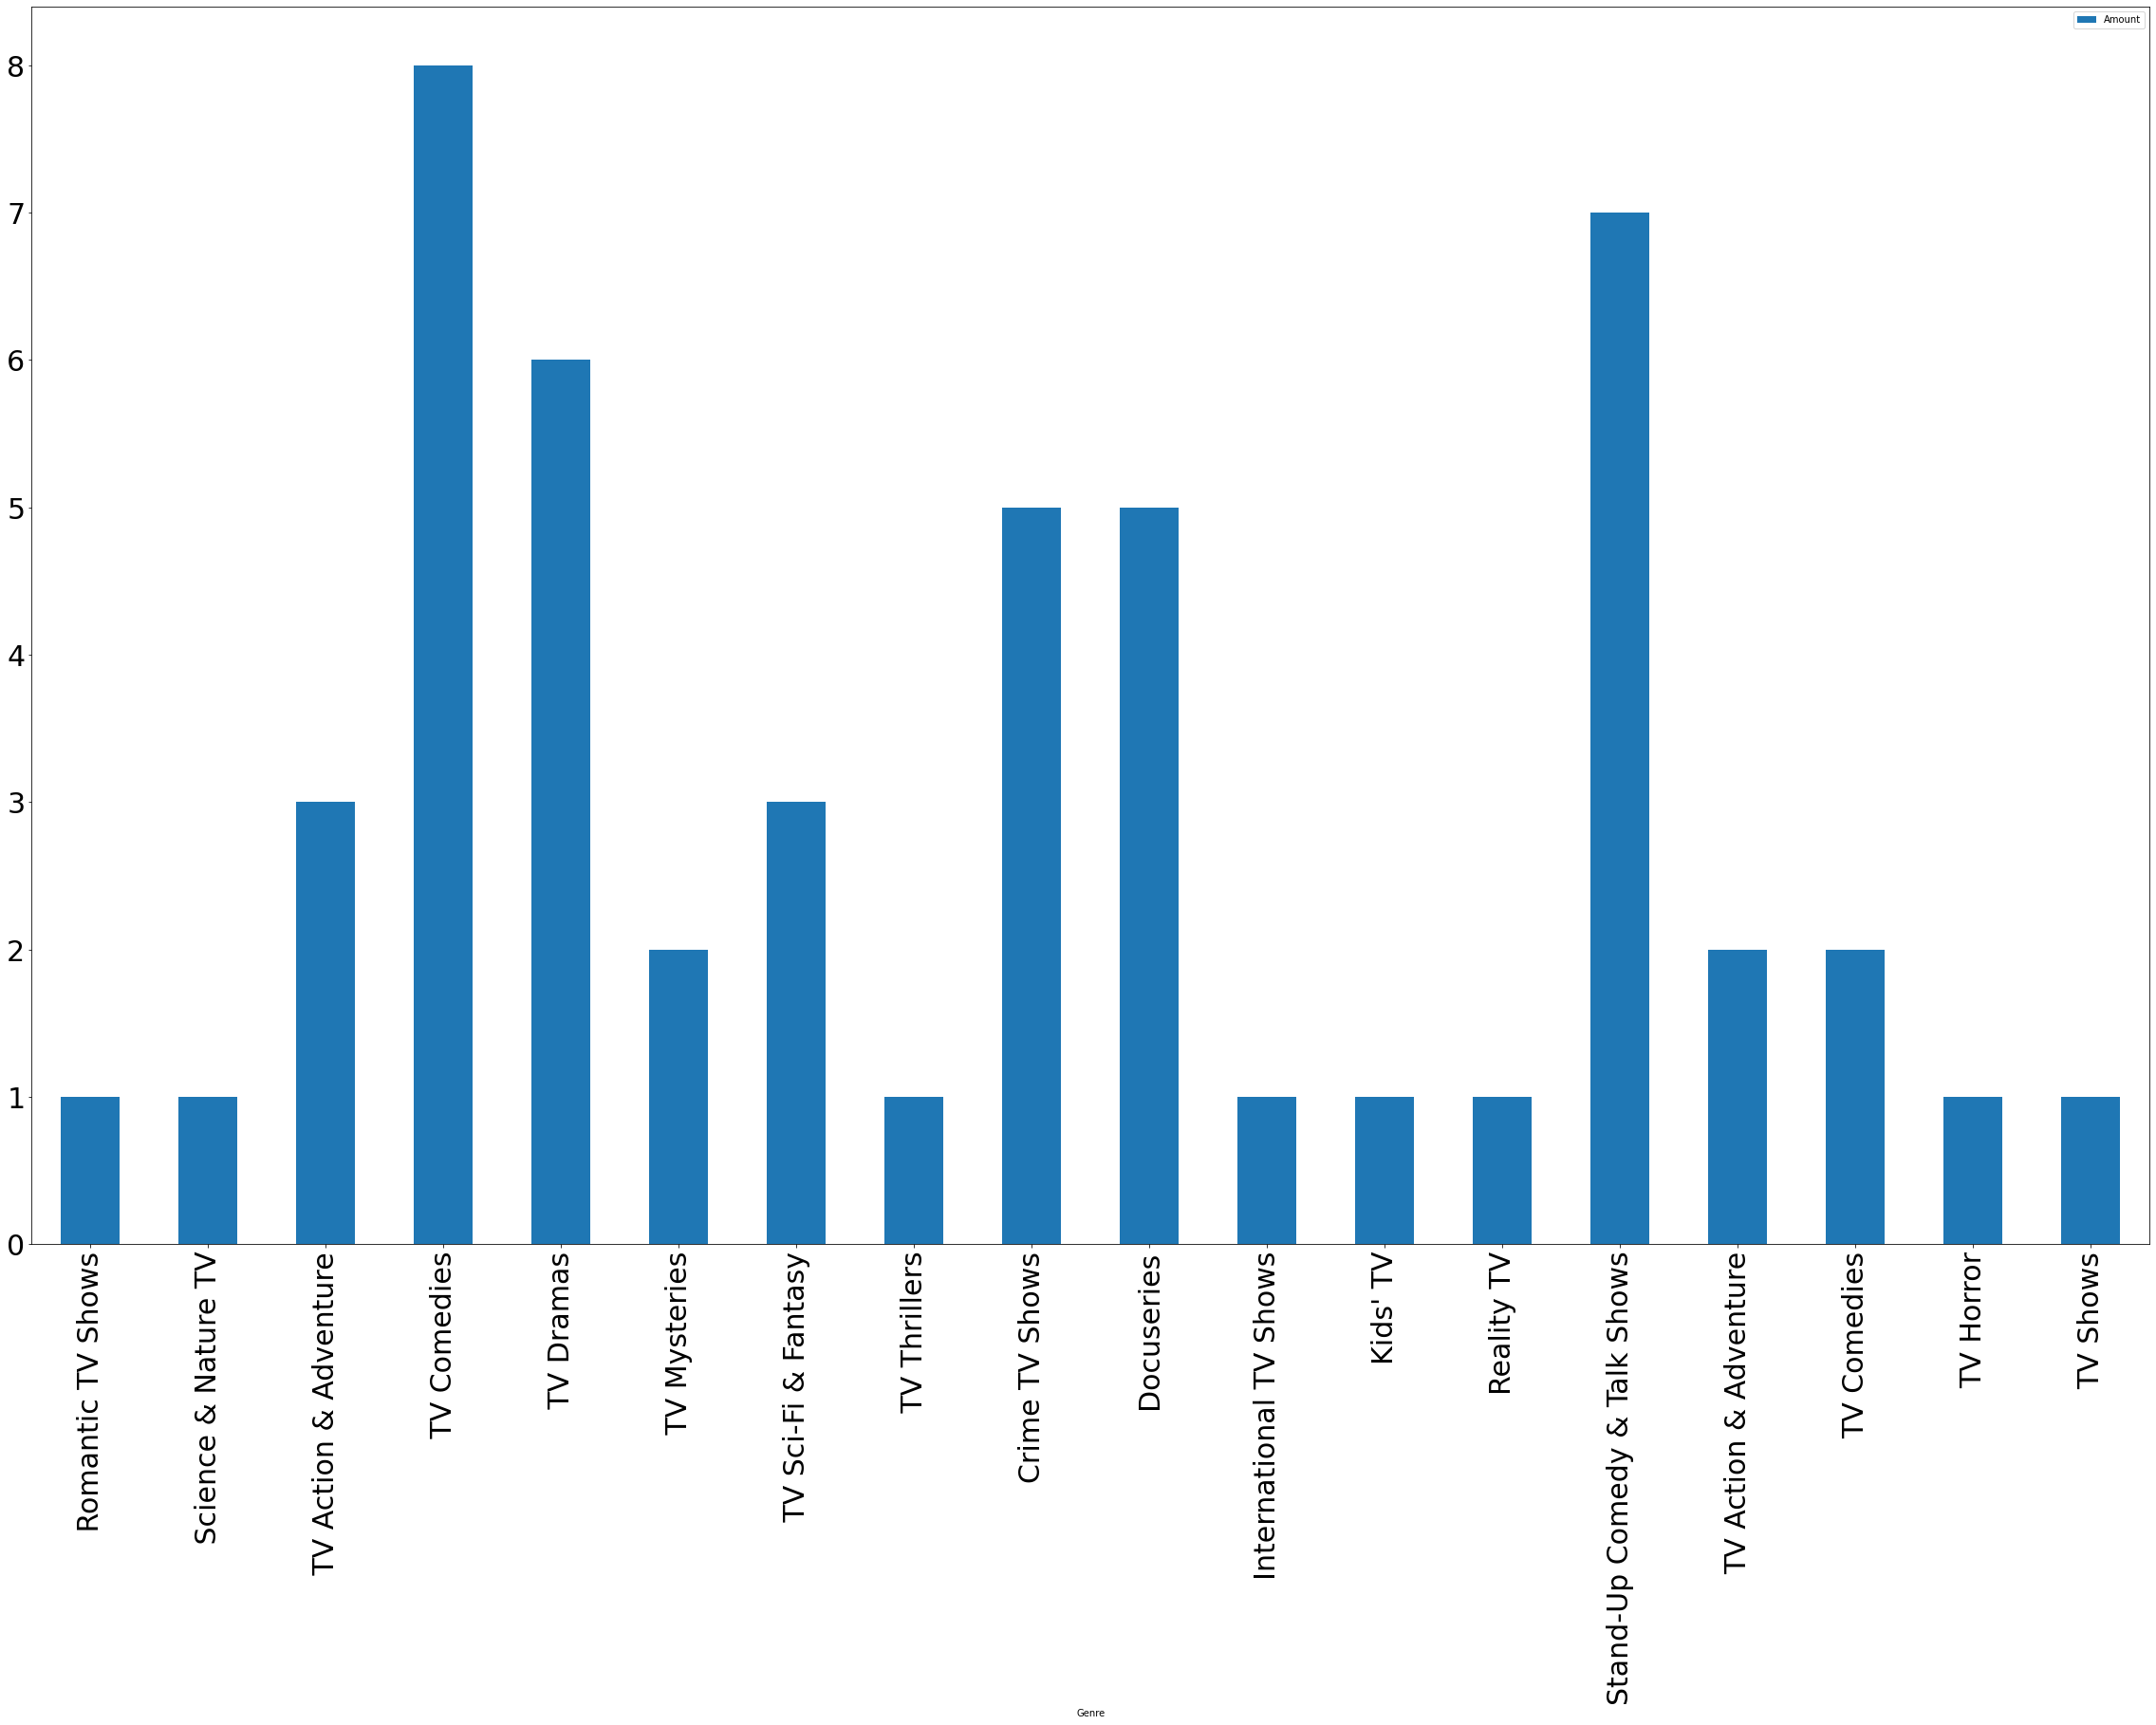

In [72]:
TV_Shows4 = df4[df4['type'] == 'TV Show']
TV_Shows4 = TV_Shows4[TV_Shows4['country'] == country4]
# Movies4['listed_in'] = Movies4['listed_in'].str.strip()
# theloume mono listed_in



TV_Shows4 = TV_Shows4.groupby(["listed_in"], as_index=False).count()
TV_Shows4 = TV_Shows4[['listed_in', 'show_id']]
TV_Shows4.columns = ['Genre', 'Amount']
TV_Shows4 = TV_Shows4.reset_index()
TV_Shows4['Genre'] = TV_Shows4['Genre'].str.split(',')


TV_Shows4 = (TV_Shows4
 .set_index(['index','Amount'])['Genre']
 .apply(pd.Series)
 .stack()
 .reset_index()
 .drop('level_2', axis=1)
 .rename(columns={0:'Genre'}))


# Movies4['Genre'] = Movies4['Genre'].str.split('&')

    
# Movies4 = (Movies4
#  .set_index(['index','Amount'])['Genre']
#  .apply(pd.Series)
#  .stack()
#  .reset_index()
#  .drop('level_2', axis=1)
#  .rename(columns={0:'Genre'}))

TV_Shows4 = TV_Shows4.groupby(['Genre'], as_index=False).sum()

TV_Shows4.plot(x ='Genre', y='Amount', kind = 'bar', figsize=(40,24), fontsize=30)
plt.show()

### Ερωτημα 5

In [73]:
df5 = df.copy()

country5 = 'Spain'

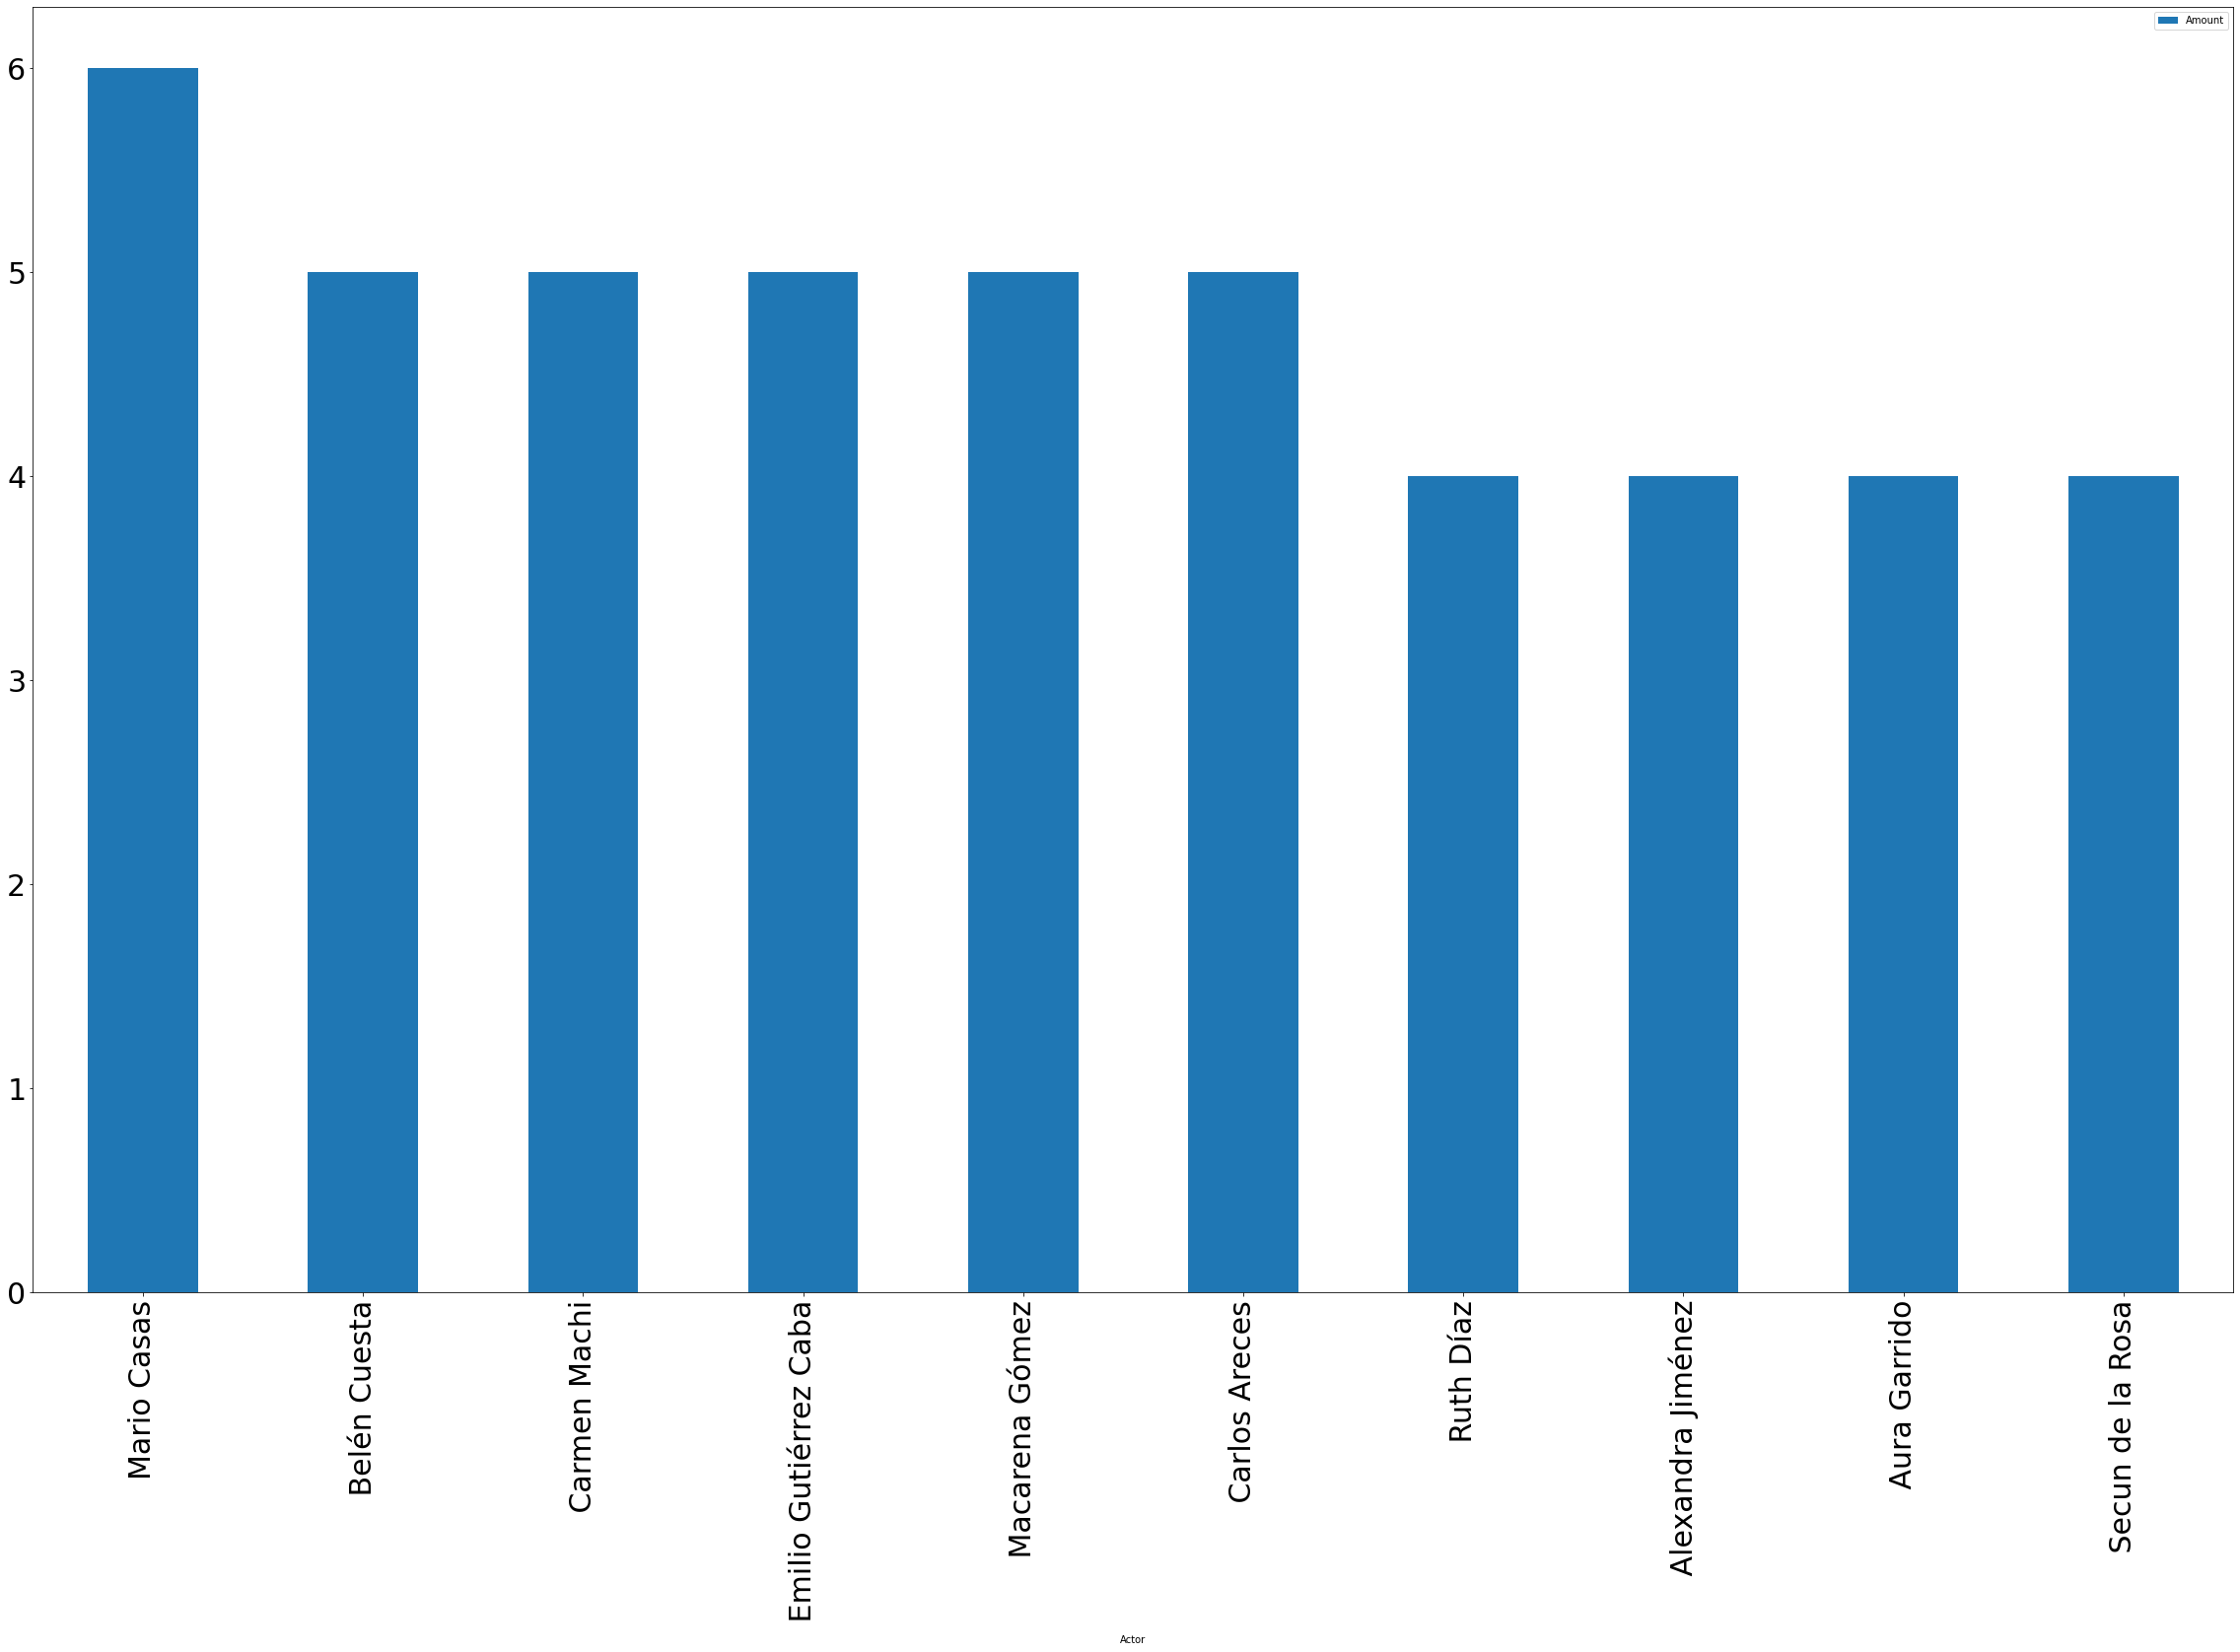

In [74]:
Movies5 = df5[df5['type'] == 'Movie']
Movies5 = Movies5[Movies5['country'] == country5]
Movies5 = Movies5.reset_index()

# cast einai oi actors
Movies5 = Movies5.groupby(["cast"], as_index=False).count()
Movies5 = Movies5[['cast', 'show_id']]
Movies5.columns = ['Actor', 'Amount']
Movies5 = Movies5.reset_index()
Movies5['Actor'] = Movies5['Actor'].str.split(',')

Movies5 = (Movies5
 .set_index(['index','Amount'])['Actor']
 .apply(pd.Series)
 .stack()
 .reset_index()
 .drop('level_2', axis=1)
 .rename(columns={0:'Actor'}))

Movies5 = Movies5.groupby(['Actor'], as_index=False).sum()
Movies5 = Movies5.sort_values('Amount', ascending=False)
Movies5 = Movies5.head(10)

Movies5.plot(x ='Actor', y='Amount', kind = 'bar', figsize=(40,24), fontsize=30)
plt.show()


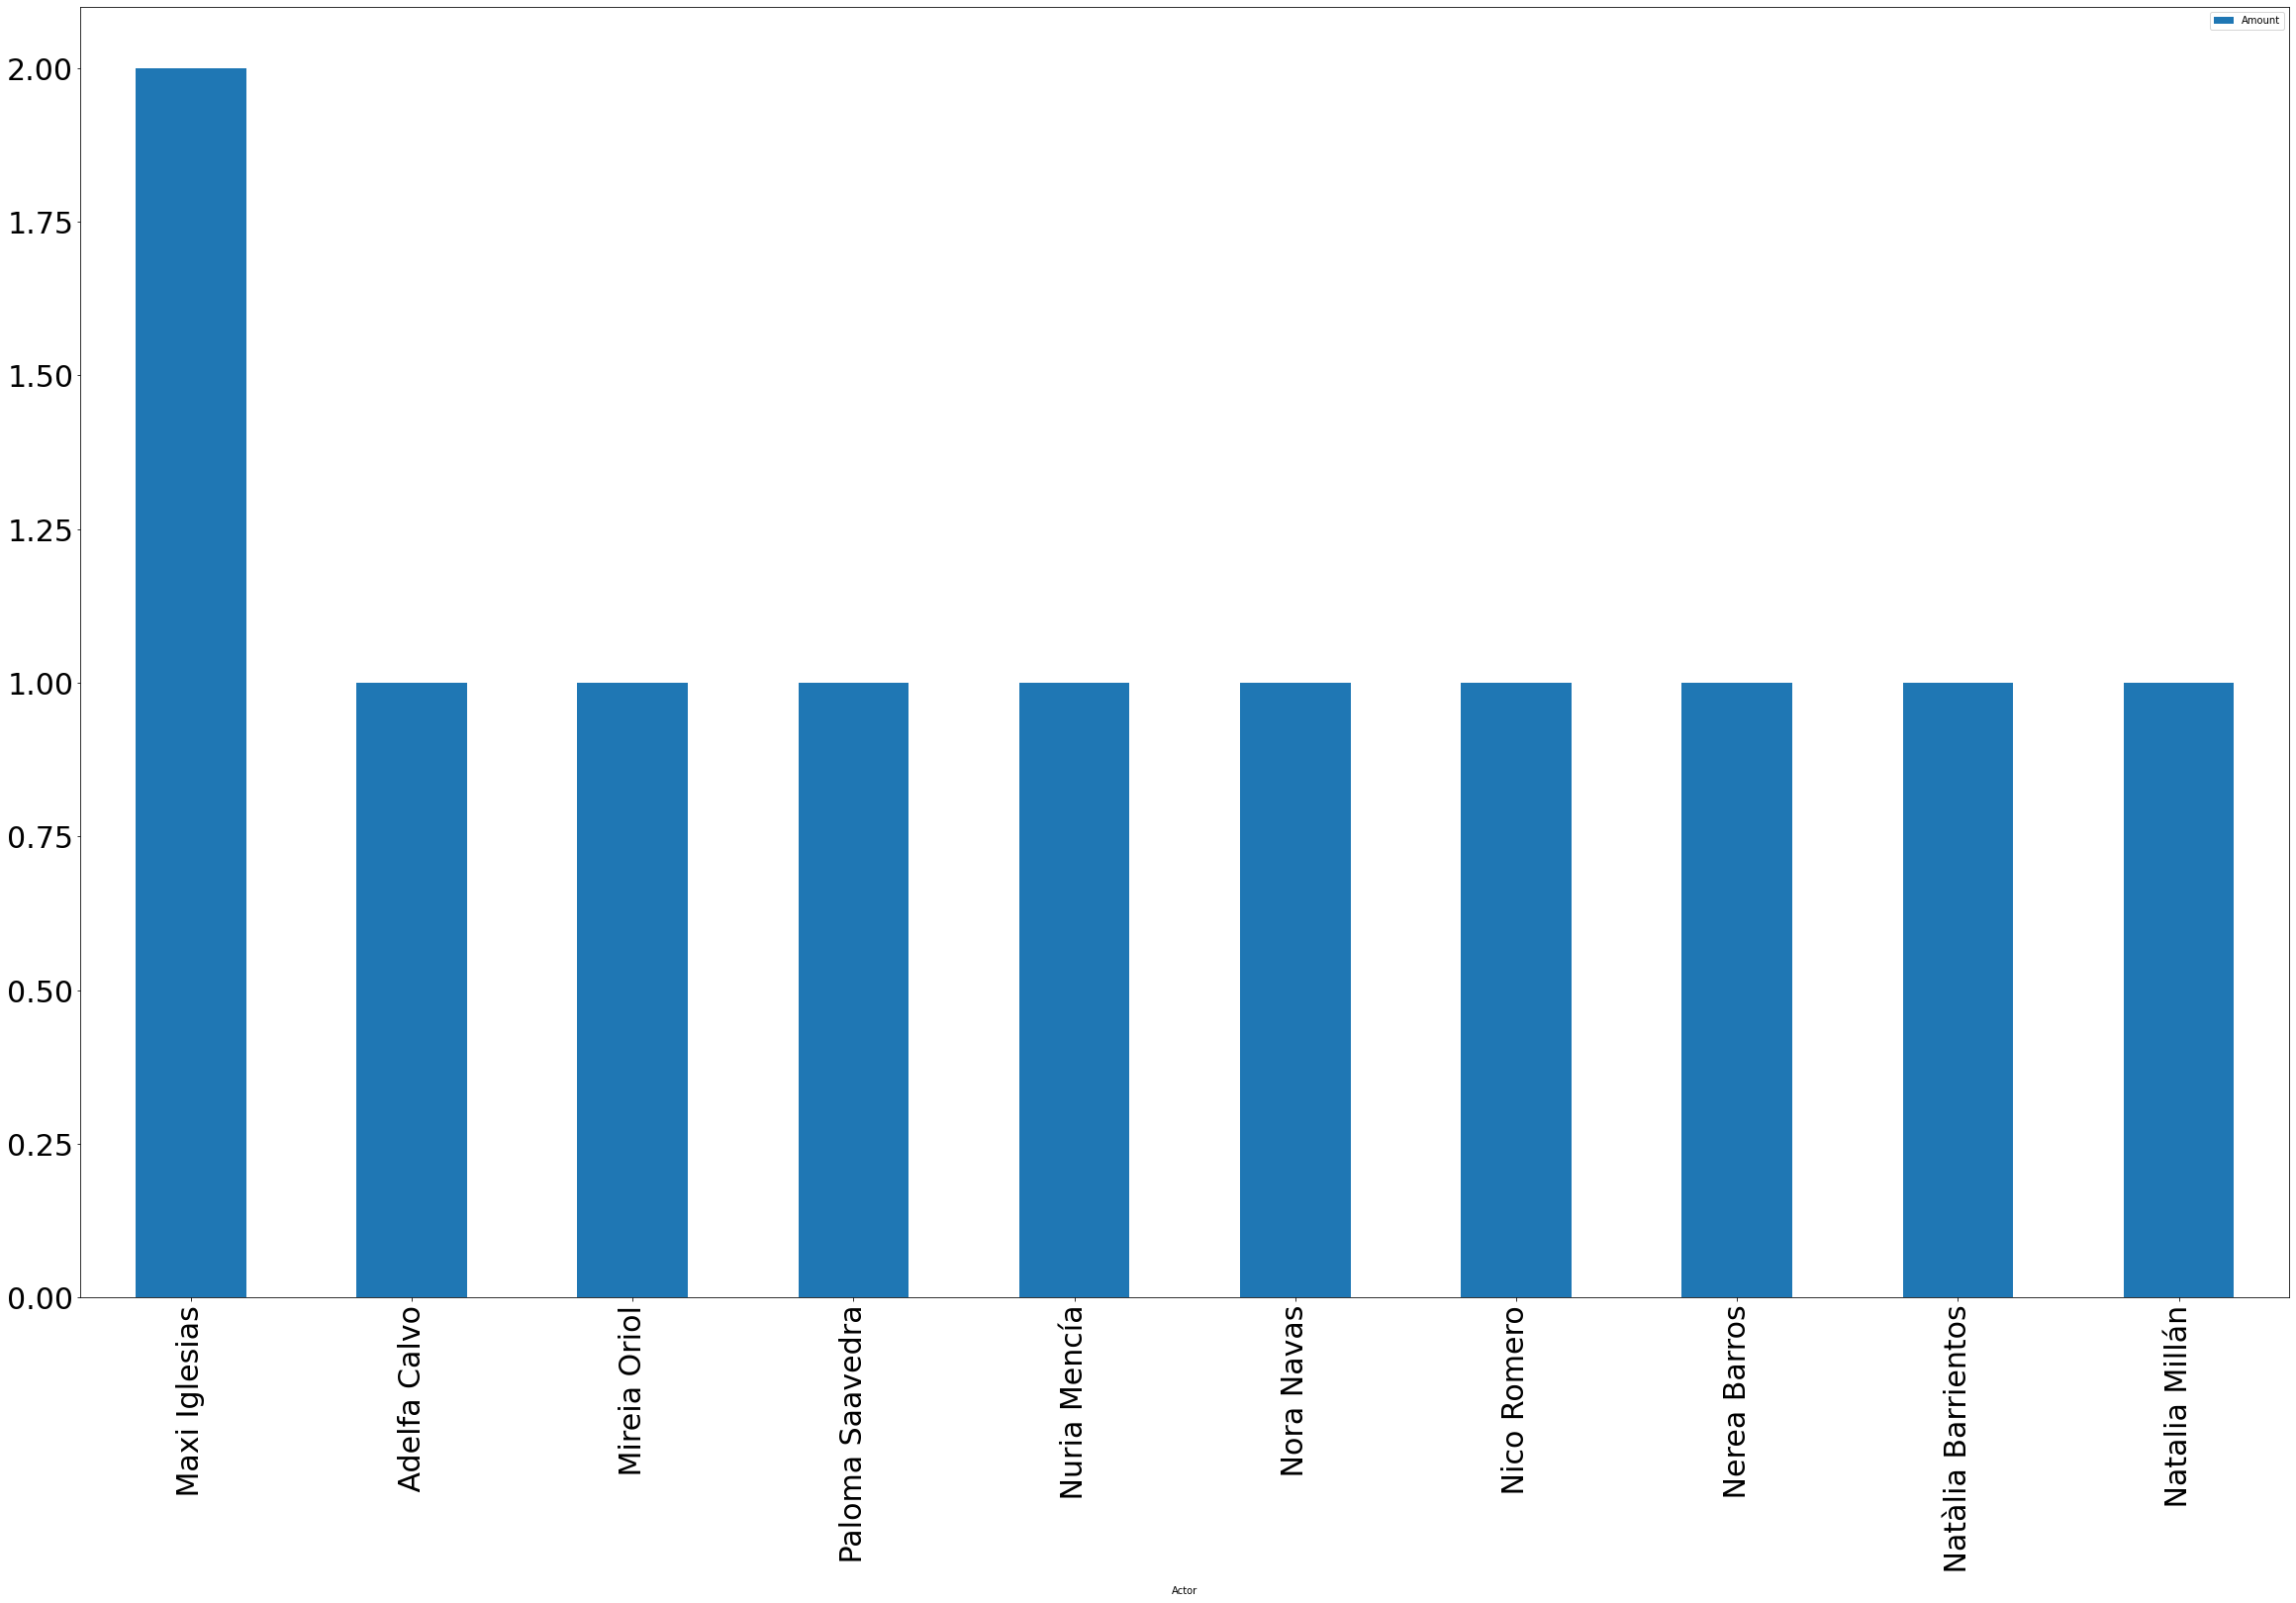

In [75]:
TV_Shows5 = df5[df5['type'] == 'TV Show']
TV_Shows5 = TV_Shows5[TV_Shows5['country'] == country5]
TV_Shows5 = TV_Shows5.reset_index()

TV_Shows5 = TV_Shows5.groupby(["cast"], as_index=False).count()
TV_Shows5 = TV_Shows5[['cast', 'show_id']]
TV_Shows5.columns = ['Actor', 'Amount']
TV_Shows5 = TV_Shows5.reset_index()
TV_Shows5['Actor'] = TV_Shows5['Actor'].str.split(',')

TV_Shows5 = (TV_Shows5
 .set_index(['index','Amount'])['Actor']
 .apply(pd.Series)
 .stack()
 .reset_index()
 .drop('level_2', axis=1)
 .rename(columns={0:'Actor'}))

TV_Shows5 = TV_Shows5.groupby(['Actor'], as_index=False).sum()
TV_Shows5 = TV_Shows5.sort_values('Amount', ascending=False)
TV_Shows5 = TV_Shows5.head(10)

TV_Shows5.plot(x ='Actor', y='Amount', kind = 'bar', figsize=(40,24), fontsize=30)
plt.show()


### Ερωτημα 6

In [76]:
df6 = df.copy()
df6 = df6.groupby(["type","rating"], as_index=False).count()

Little_Kids = ['G', 'TV-Y', 'TV-G']
Older_Kids = ['PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG']
Teens = ['PG-13', 'TV-14']
Mature = ['R', 'NC-17', 'TV-MA']


Movies

<BarContainer object of 4 artists>

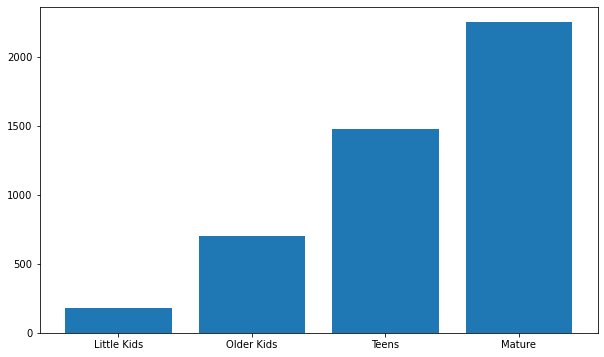

In [77]:
Movies6 = df6[df6["type"] == "Movie"]
Movies6 = Movies6[["rating", "show_id"]]
Movies6.columns = ["Rating", "Amount"]

NumberOfMovies = []
Categories = ['Little Kids', 'Older Kids', 'Teens', 'Mature']

Movies_little = Movies6[Movies6["Rating"].isin(Little_Kids)]
Movies_older = Movies6[Movies6["Rating"].isin(Older_Kids)]
Movies_Teens = Movies6[Movies6["Rating"].isin(Teens)]
Movies_Mature = Movies6[Movies6["Rating"].isin(Mature)]

NumberOfMovies.append(Movies_little['Amount'].sum())
NumberOfMovies.append(Movies_older['Amount'].sum())
NumberOfMovies.append(Movies_Teens['Amount'].sum())
NumberOfMovies.append(Movies_Mature['Amount'].sum())

fig = plt.figure(figsize=(10,6))
plt.bar(Categories,NumberOfMovies)


TV Shows

<BarContainer object of 4 artists>

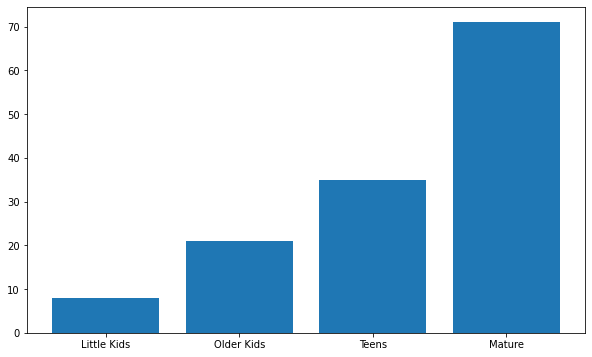

In [78]:
TV_Shows6 = df6[df6["type"] == "TV Show"]
TV_Shows6 = TV_Shows6[["rating", "show_id"]]
TV_Shows6.columns = ["Rating", "Amount"]

NumberOfTVShows = []
Categories = ['Little Kids', 'Older Kids', 'Teens', 'Mature']

TV_little = TV_Shows6[TV_Shows6['Rating'].isin(Little_Kids)]
TV_older = TV_Shows6[TV_Shows6['Rating'].isin(Older_Kids)]
TV_Teens = TV_Shows6[TV_Shows6['Rating'].isin(Teens)]
TV_Mature = TV_Shows6[TV_Shows6['Rating'].isin(Mature)]

NumberOfTVShows.append(TV_little['Amount'].sum())
NumberOfTVShows.append(TV_older['Amount'].sum())
NumberOfTVShows.append(TV_Teens['Amount'].sum())
NumberOfTVShows.append(TV_Mature['Amount'].sum())

fig = plt.figure(figsize=(10,6))
plt.bar(Categories,NumberOfTVShows)


### Ερωτημα 7 

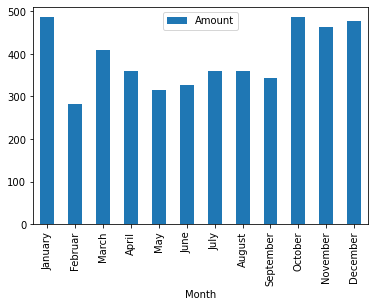

In [79]:
df7 = df.copy()

Movies = df7[df7["type"] == 'Movie']
Movies = Movies.reset_index()


months = ['January', 'Februar', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

def modifyMonth(numer):
    if pd.isna(numer):
        return
    x = int(numer)
    month = months[x-1]
    return(month)

Movies['date_added'] = pd.to_datetime(Movies['date_added'], dayfirst=True)
Movies['date_added'] = pd.DatetimeIndex(Movies['date_added']).month

Movies = Movies.groupby('date_added', as_index = False).count()
Movies = Movies.sort_values('date_added')

Movies['date_added'] = Movies['date_added'].apply(modifyMonth)

Movies = Movies[["date_added", "show_id"]]
Movies.columns = ["Month", "Amount"]

Movies.plot.bar(x='Month', y='Amount')
plt.show()

### Ερωτημα 8

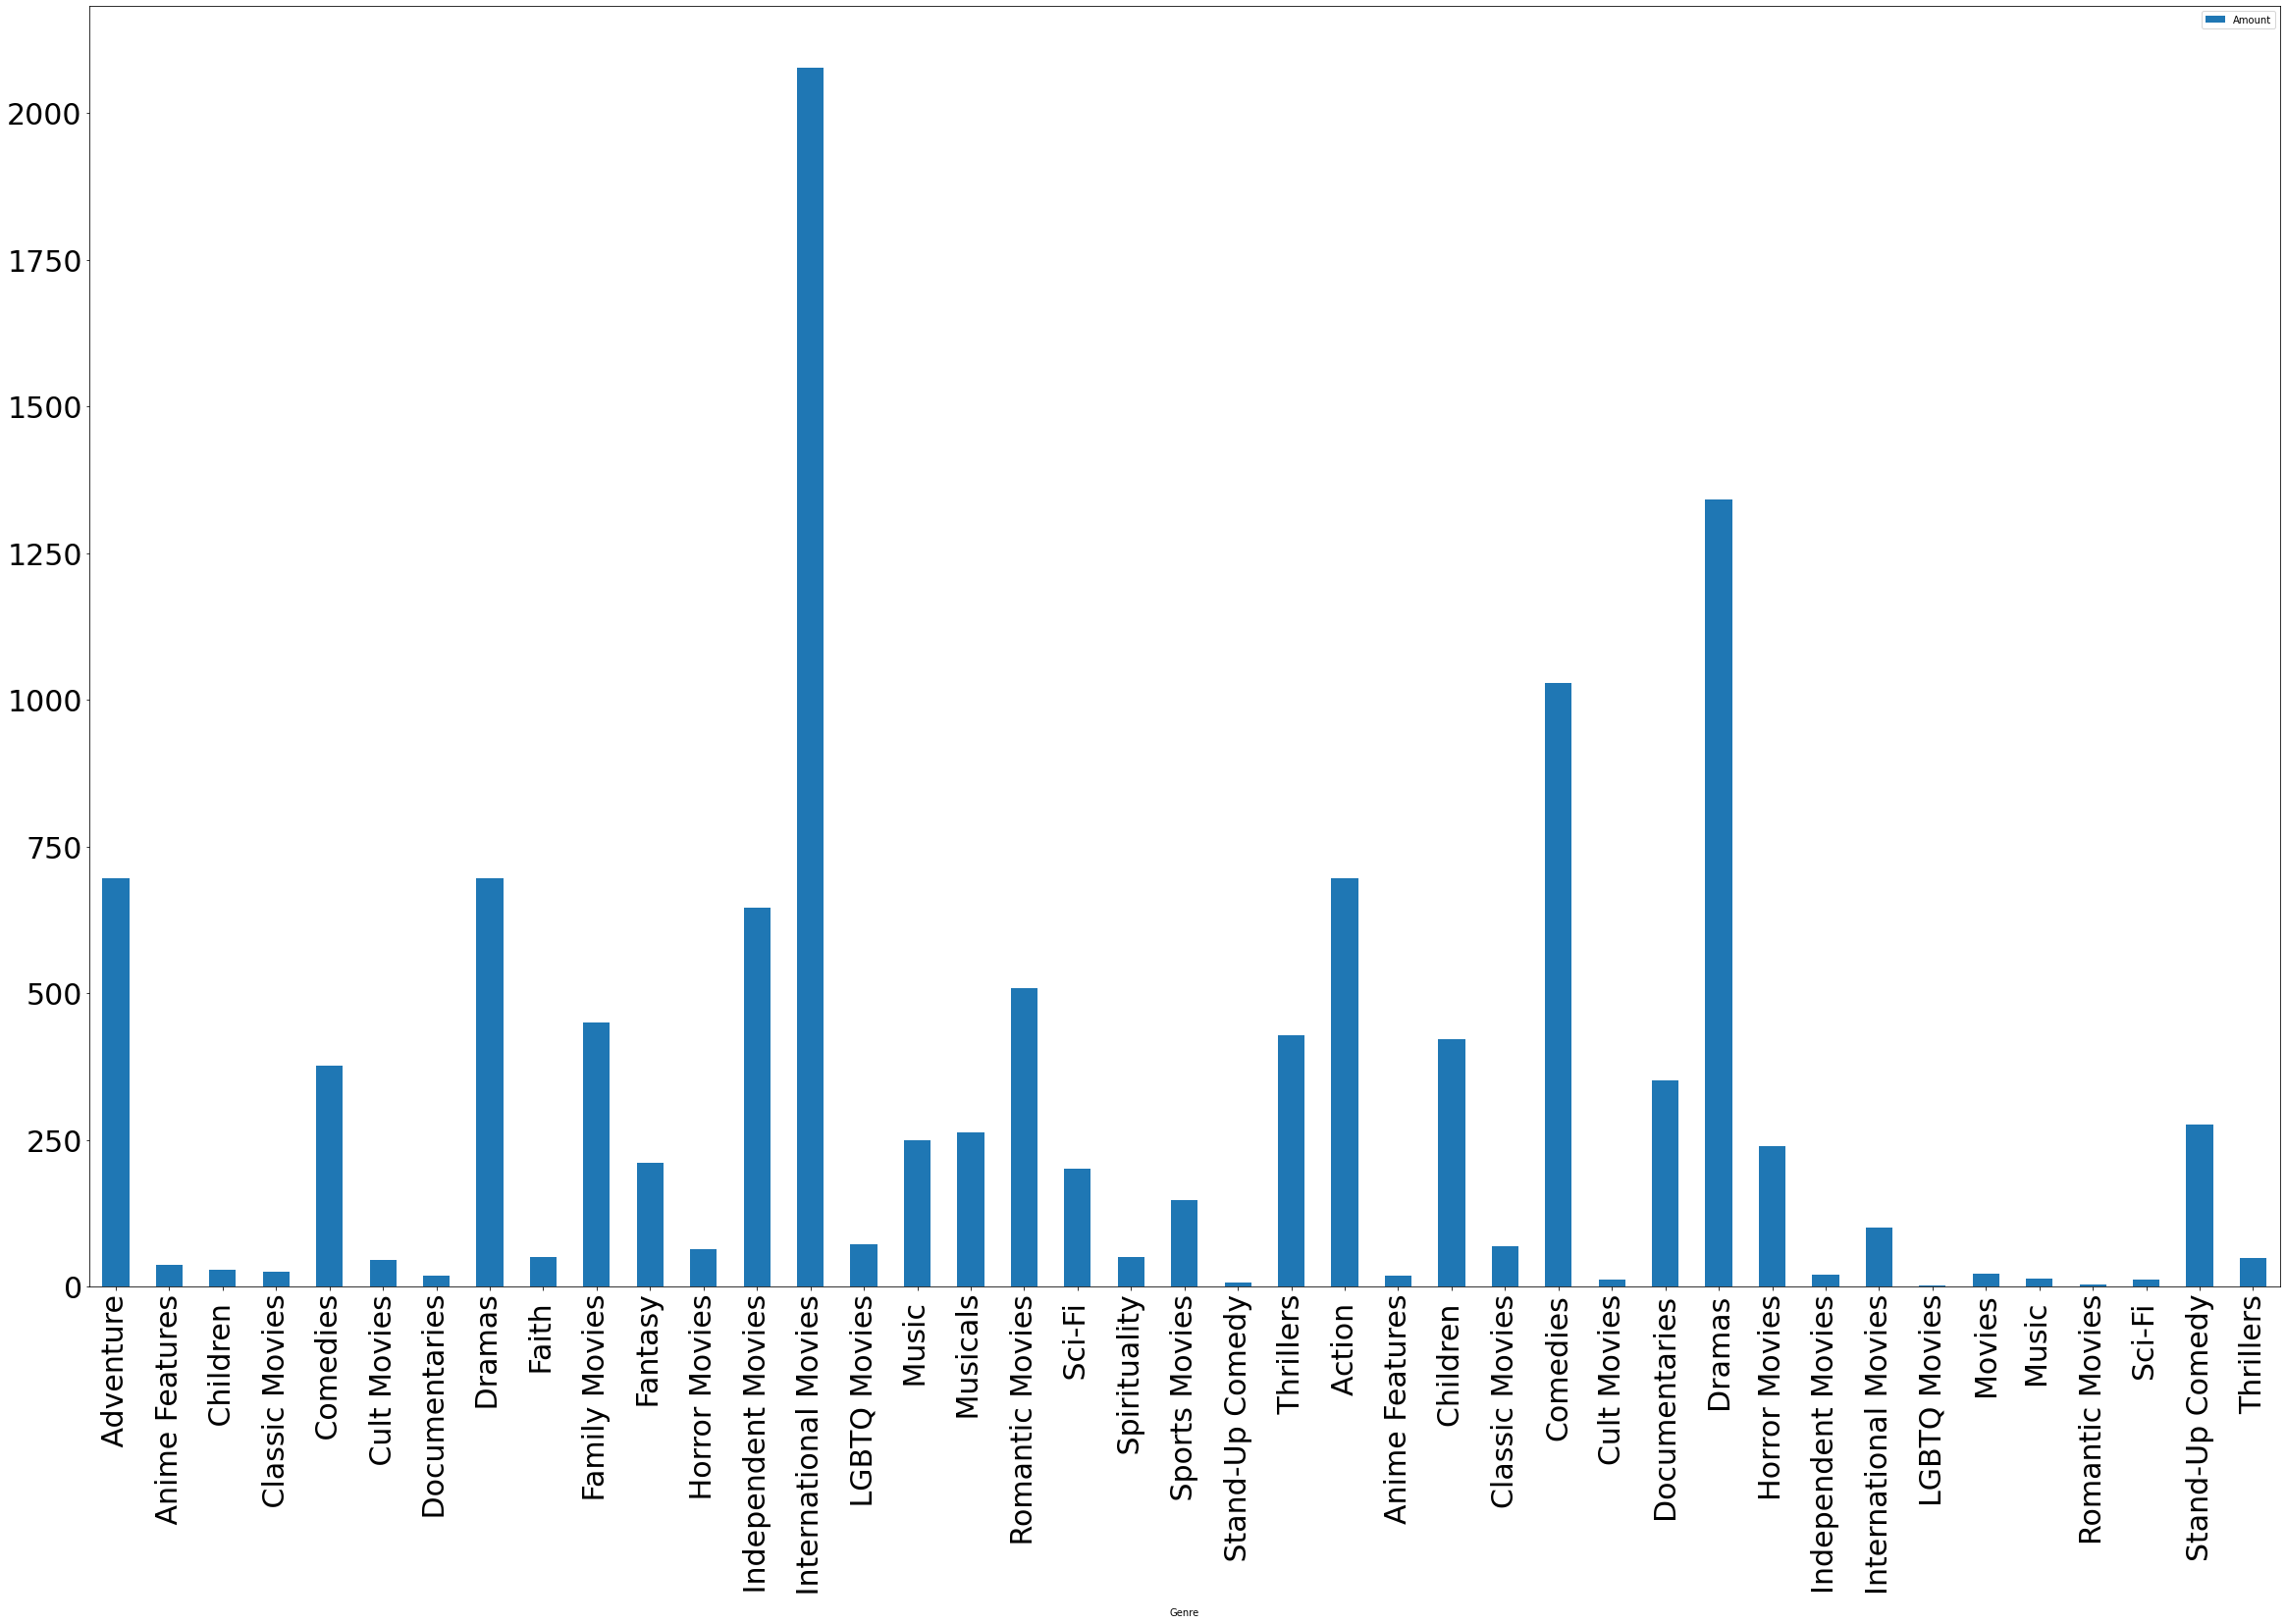

In [80]:
Movies8 = df.copy()
Movies8 = Movies8[Movies8["type"] == "Movie"]
Movies8 = Movies8.groupby(["listed_in"], as_index=False).count()
Movies8 = Movies8[['listed_in', 'show_id']]
Movies8.columns = ['Genre', 'Amount']
Movies8 = Movies8.reset_index()
Movies8['Genre'] = Movies8['Genre'].str.split(',')

    
Movies8 = (Movies8
 .set_index(['index','Amount'])['Genre']
 .apply(pd.Series)
 .stack()
 .reset_index()
 .drop('level_2', axis=1)
 .rename(columns={0:'Genre'}))


Movies8['Genre'] = Movies8['Genre'].str.split('&')

    
Movies8 = (Movies8
 .set_index(['index','Amount'])['Genre']
 .apply(pd.Series)
 .stack()
 .reset_index()
 .drop('level_2', axis=1)
 .rename(columns={0:'Genre'}))

Movies8 = Movies8.groupby(['Genre'], as_index=False).sum()

Movies8.plot(x ='Genre', y='Amount', kind = 'bar', figsize=(40,24), fontsize=30)
plt.show()

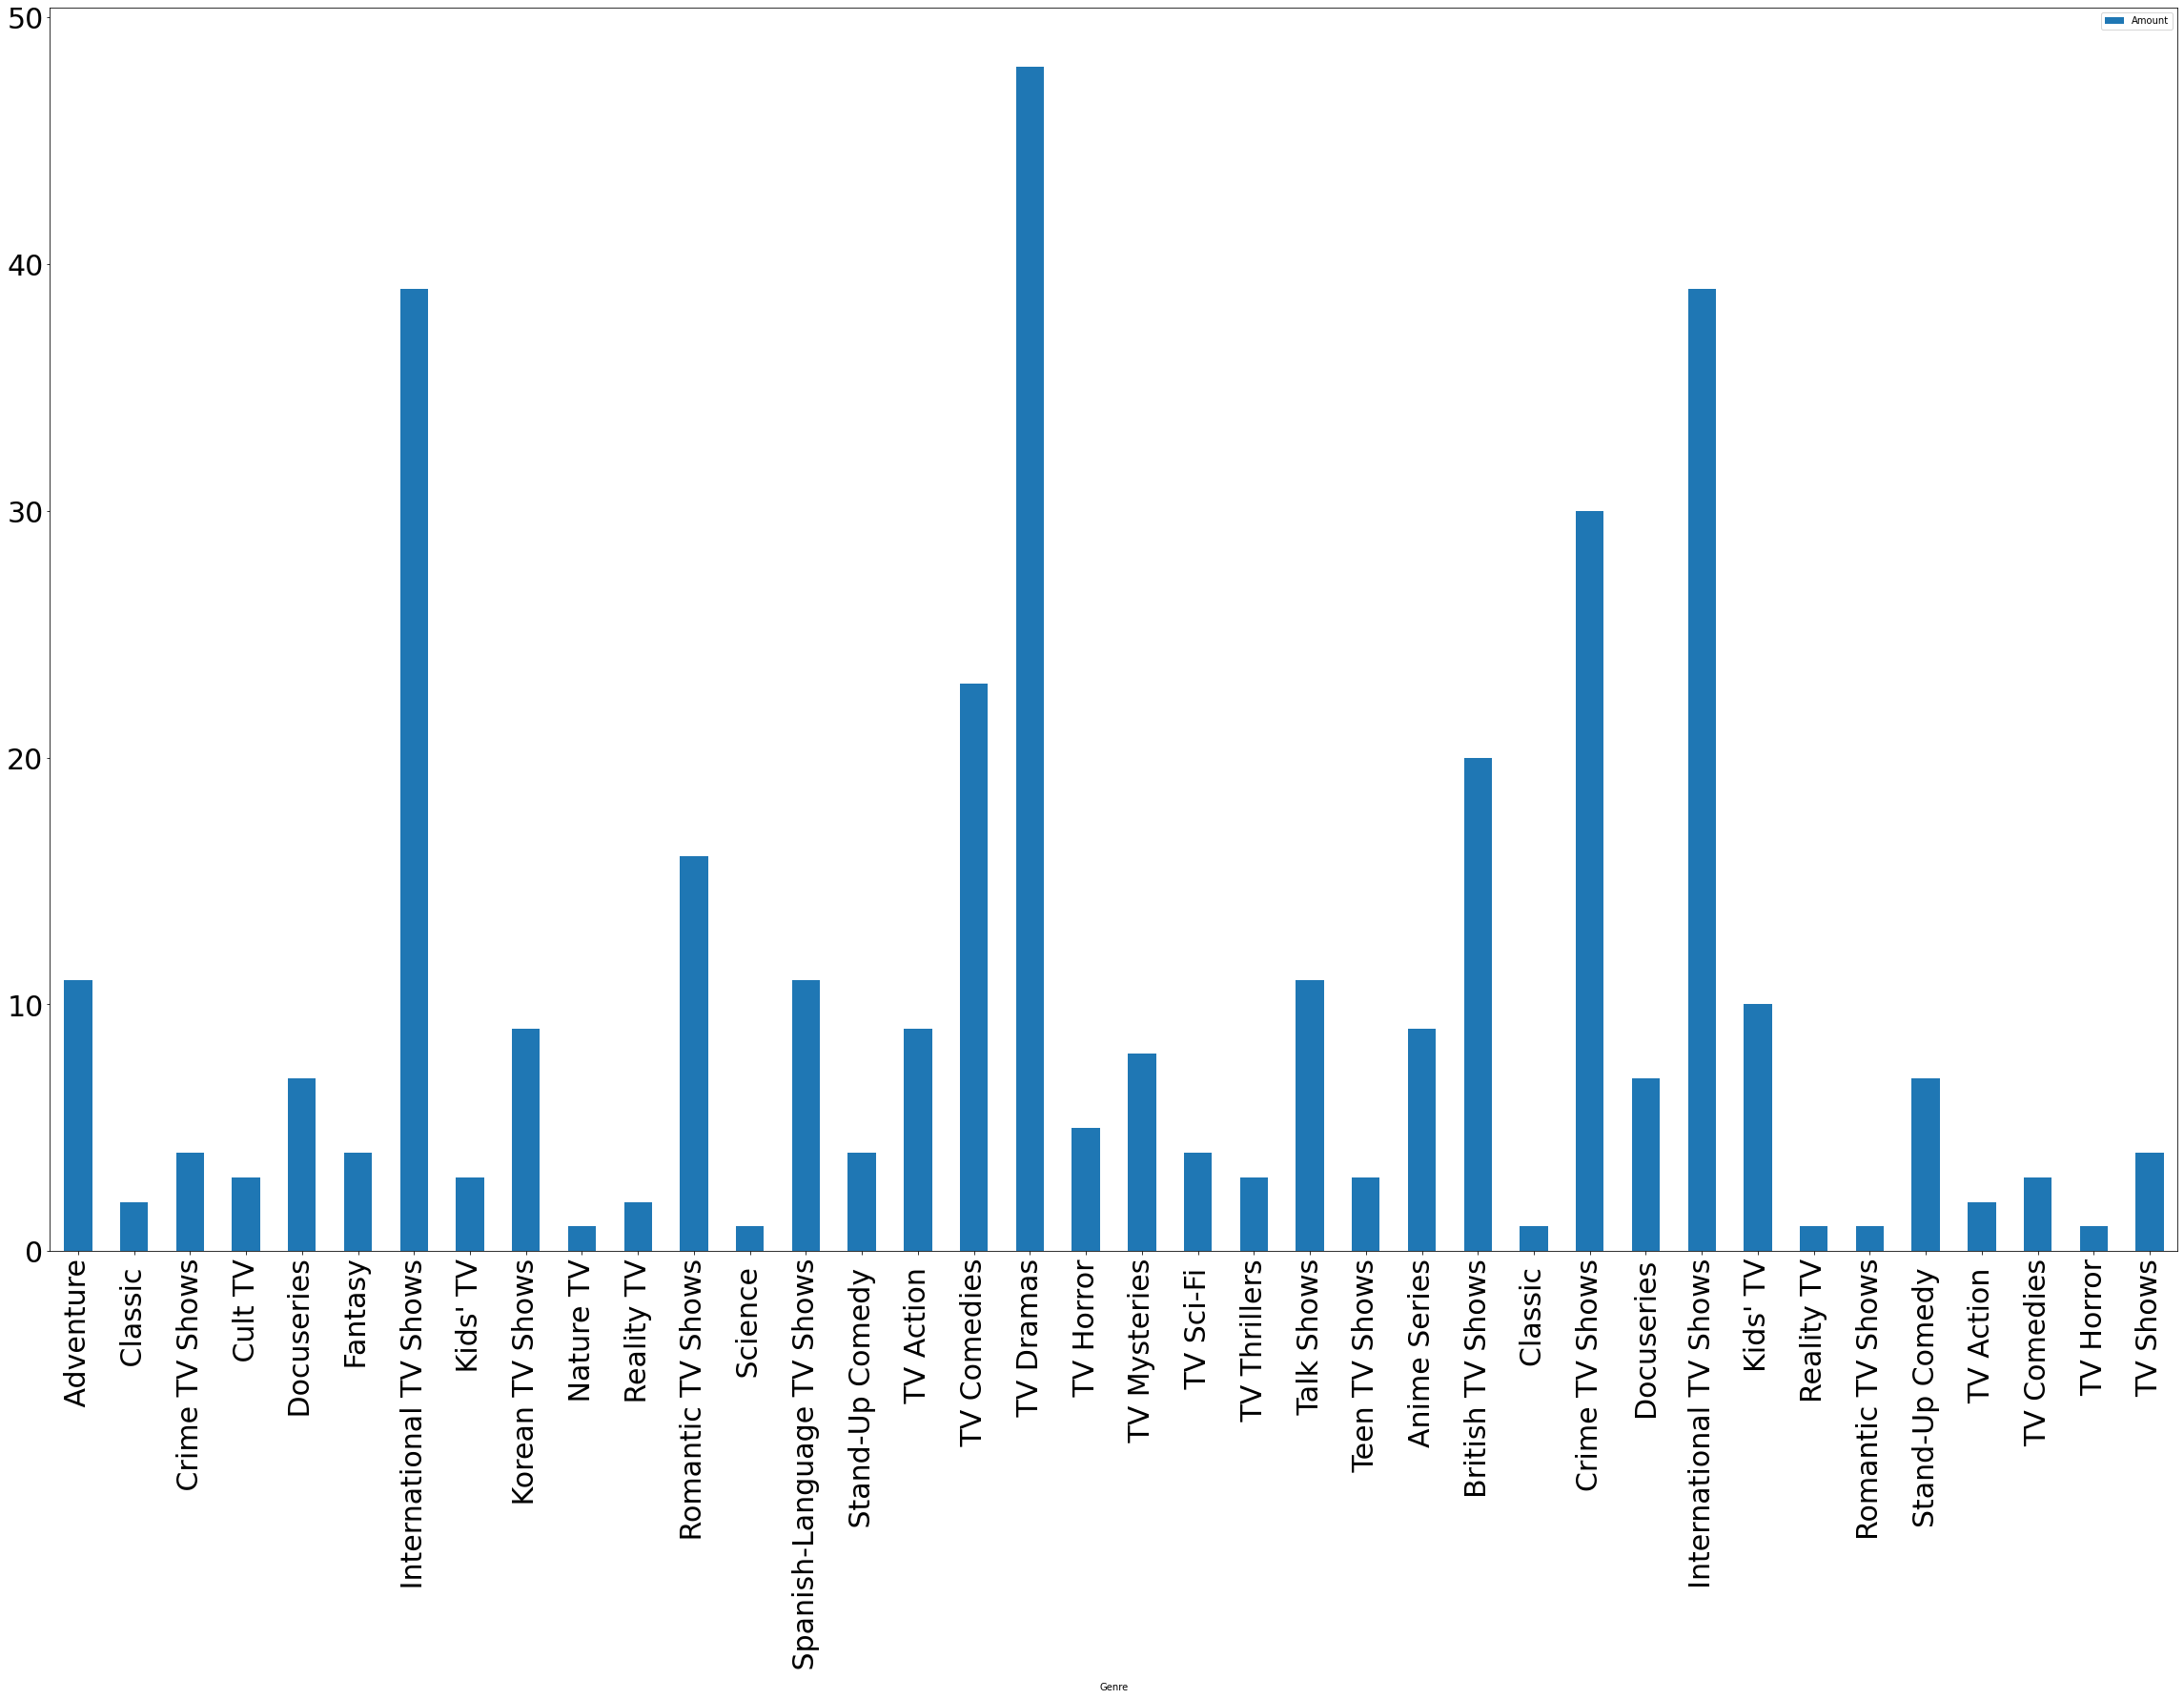

In [81]:
TV_Shows8 = df.copy()
TV_Shows8 = TV_Shows8[TV_Shows8["type"] == "TV Show"]
TV_Shows8 = TV_Shows8.groupby(["listed_in"], as_index=False).count()
TV_Shows8 = TV_Shows8[['listed_in', 'show_id']]
TV_Shows8.columns = ['Genre', 'Amount']
TV_Shows8 = TV_Shows8.reset_index()
TV_Shows8['Genre'] = TV_Shows8['Genre'].str.split(',')

    
TV_Shows8 = (TV_Shows8
 .set_index(['index','Amount'])['Genre']
 .apply(pd.Series)
 .stack()
 .reset_index()
 .drop('level_2', axis=1)
 .rename(columns={0:'Genre'}))


TV_Shows8['Genre'] = TV_Shows8['Genre'].str.split('&')

    
TV_Shows8 = (TV_Shows8
 .set_index(['index','Amount'])['Genre']
 .apply(pd.Series)
 .stack()
 .reset_index()
 .drop('level_2', axis=1)
 .rename(columns={0:'Genre'}))

TV_Shows8 = TV_Shows8.groupby(['Genre'], as_index=False).sum()

TV_Shows8.plot(x ='Genre', y='Amount', kind = 'bar', figsize=(40,24), fontsize=30)
plt.show()

### Ερωτημα 9

In [91]:
df9 = df.copy()

country9 = 'United States'


#### 10 σκηνοθετες με τις περισσοτερες ταινιες

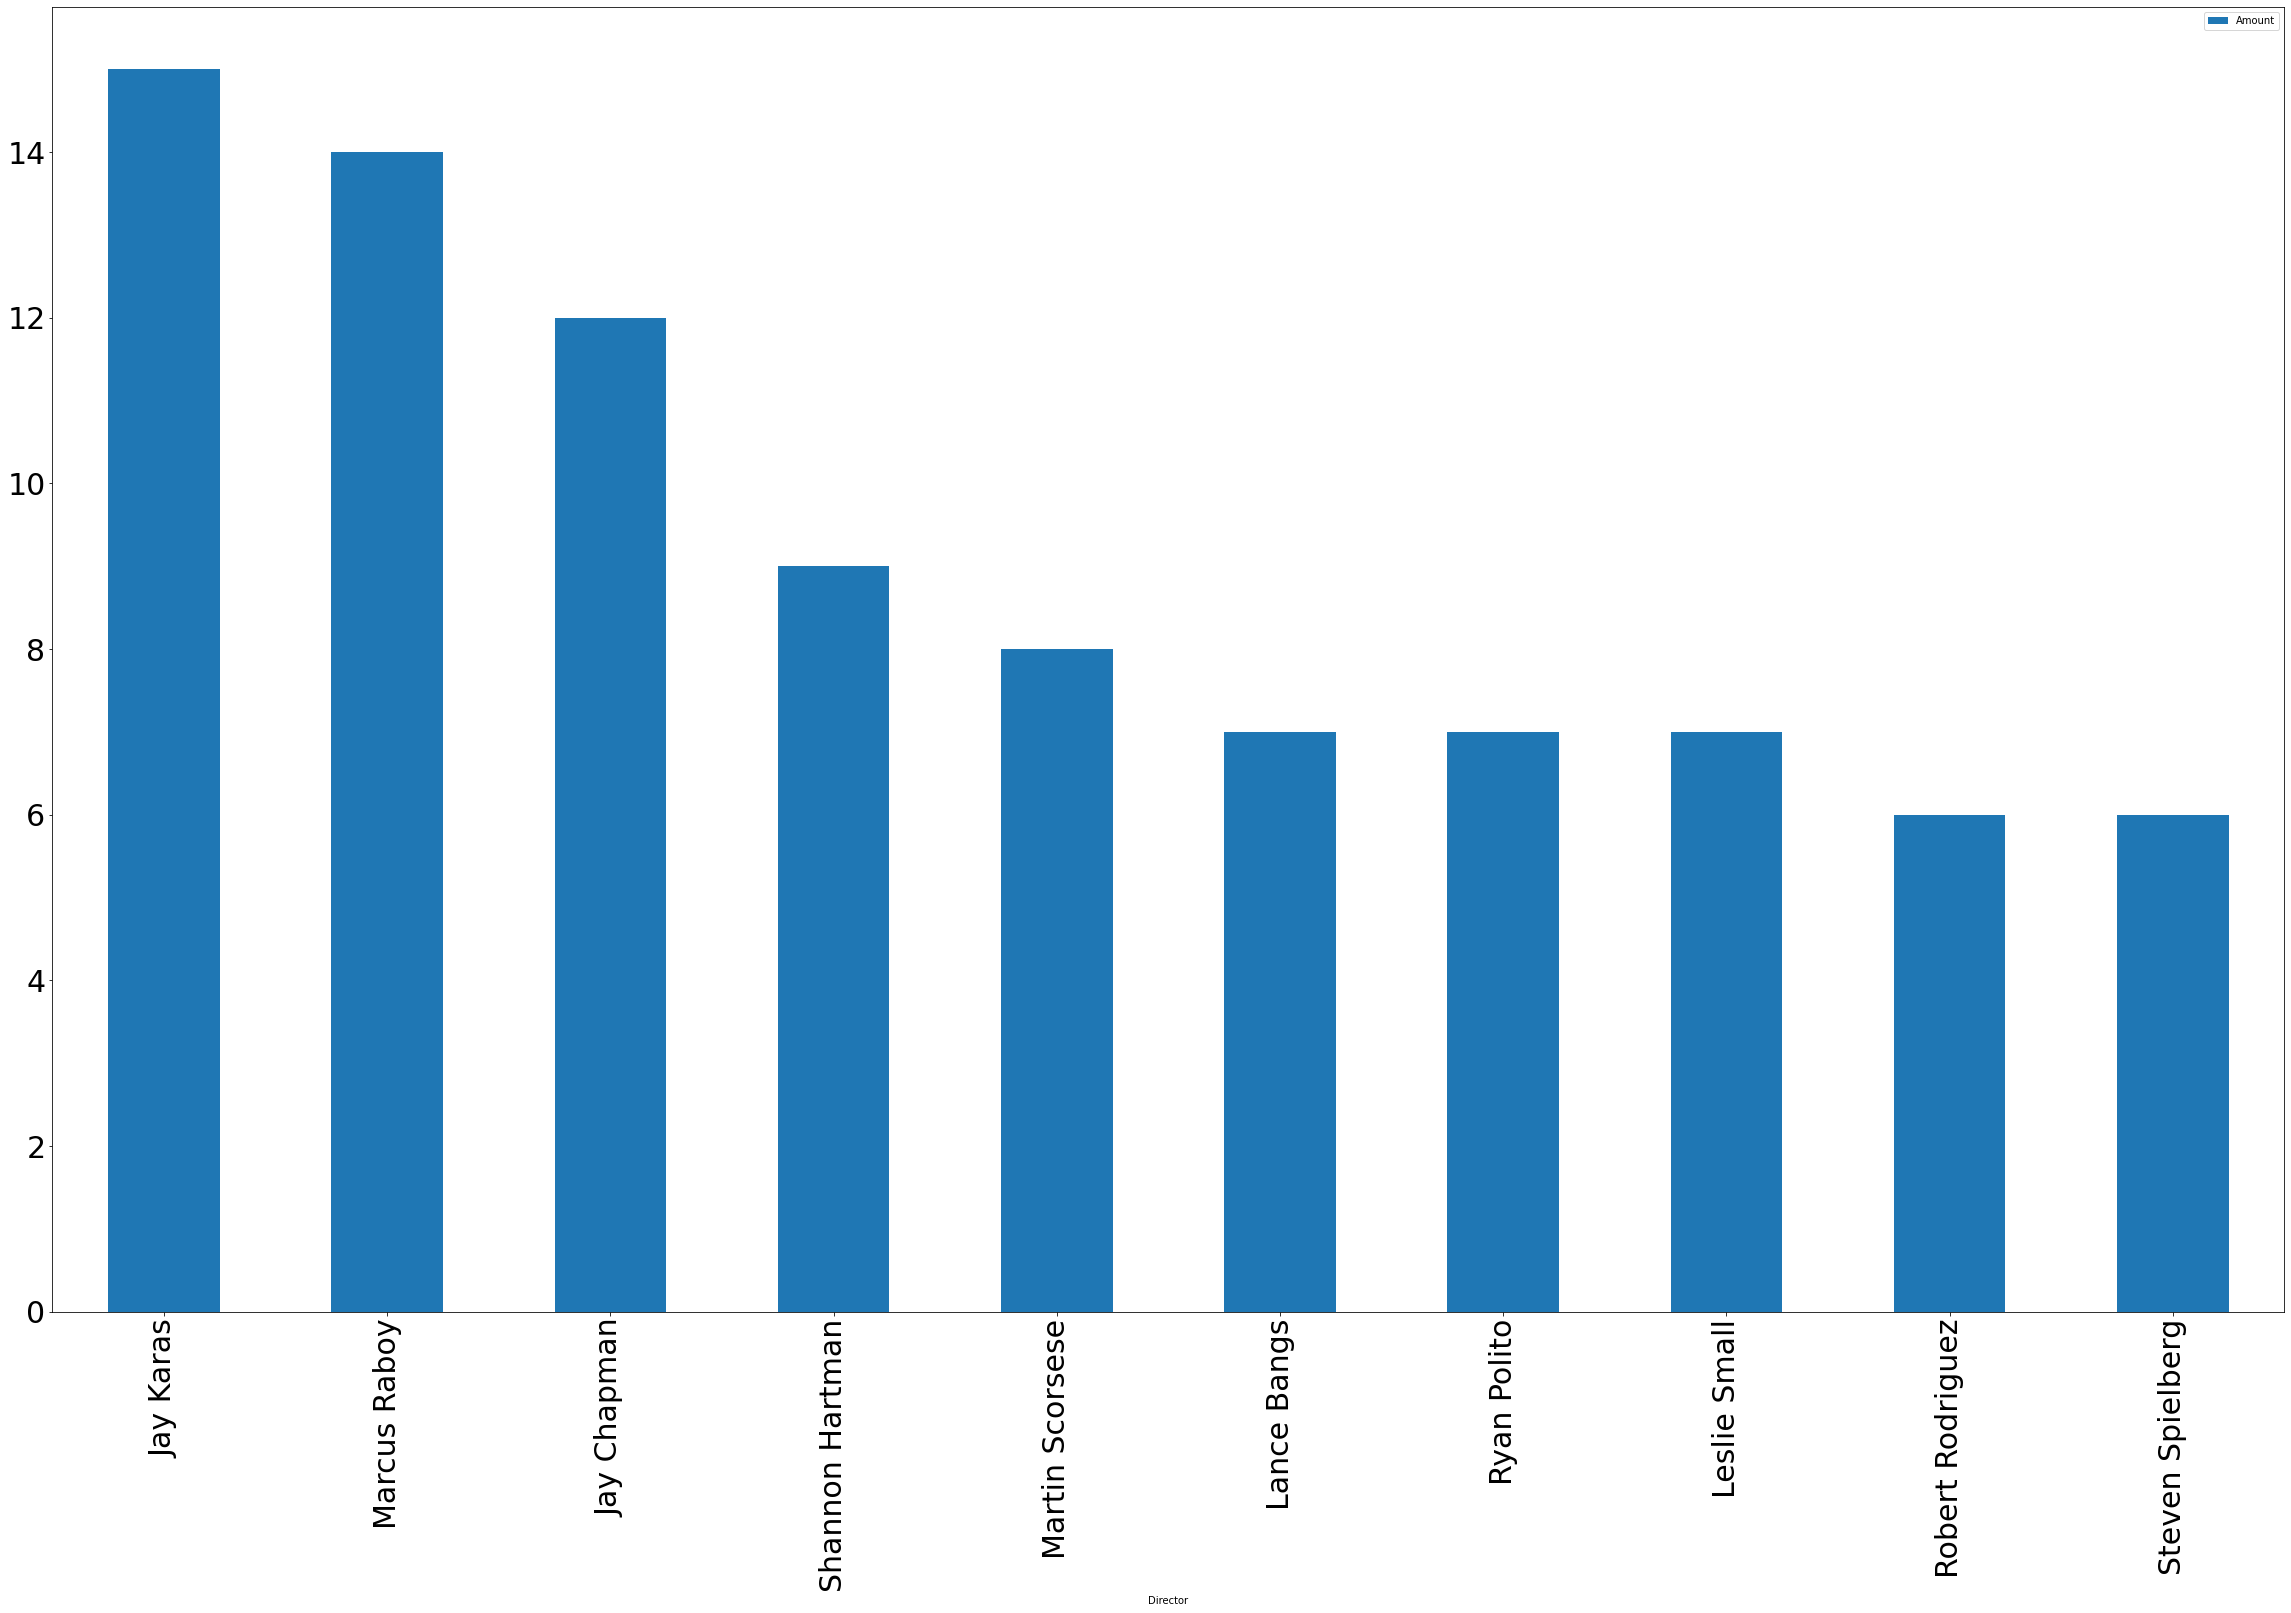

In [92]:
Movies9 = df9[df9['type'] == 'Movie']
Movies9 = Movies9[Movies9['country'] == country9]
Movies9 = Movies9.reset_index()

Movies9 = Movies9.groupby(["director"], as_index=False).count()
Movies9 = Movies9[['director', 'show_id']]
Movies9.columns = ['Director', 'Amount']
Movies9 = Movies9.reset_index()
Movies9['Director'] = Movies9['Director'].str.split(',')

Movies9 = (Movies9
 .set_index(['index','Amount'])['Director']
 .apply(pd.Series)
 .stack()
 .reset_index()
 .drop('level_2', axis=1)
 .rename(columns={0:'Director'}))

Movies9 = Movies9.groupby(['Director'], as_index=False).sum()
Movies9 = Movies9.sort_values('Amount', ascending=False)
Movies9 = Movies9.head(10)

Movies9.plot(x ='Director', y='Amount', kind = 'bar', figsize=(40,24), fontsize=30)
plt.show()


#### 10 σκηνοθετες με τις περισσοτερες σειρες

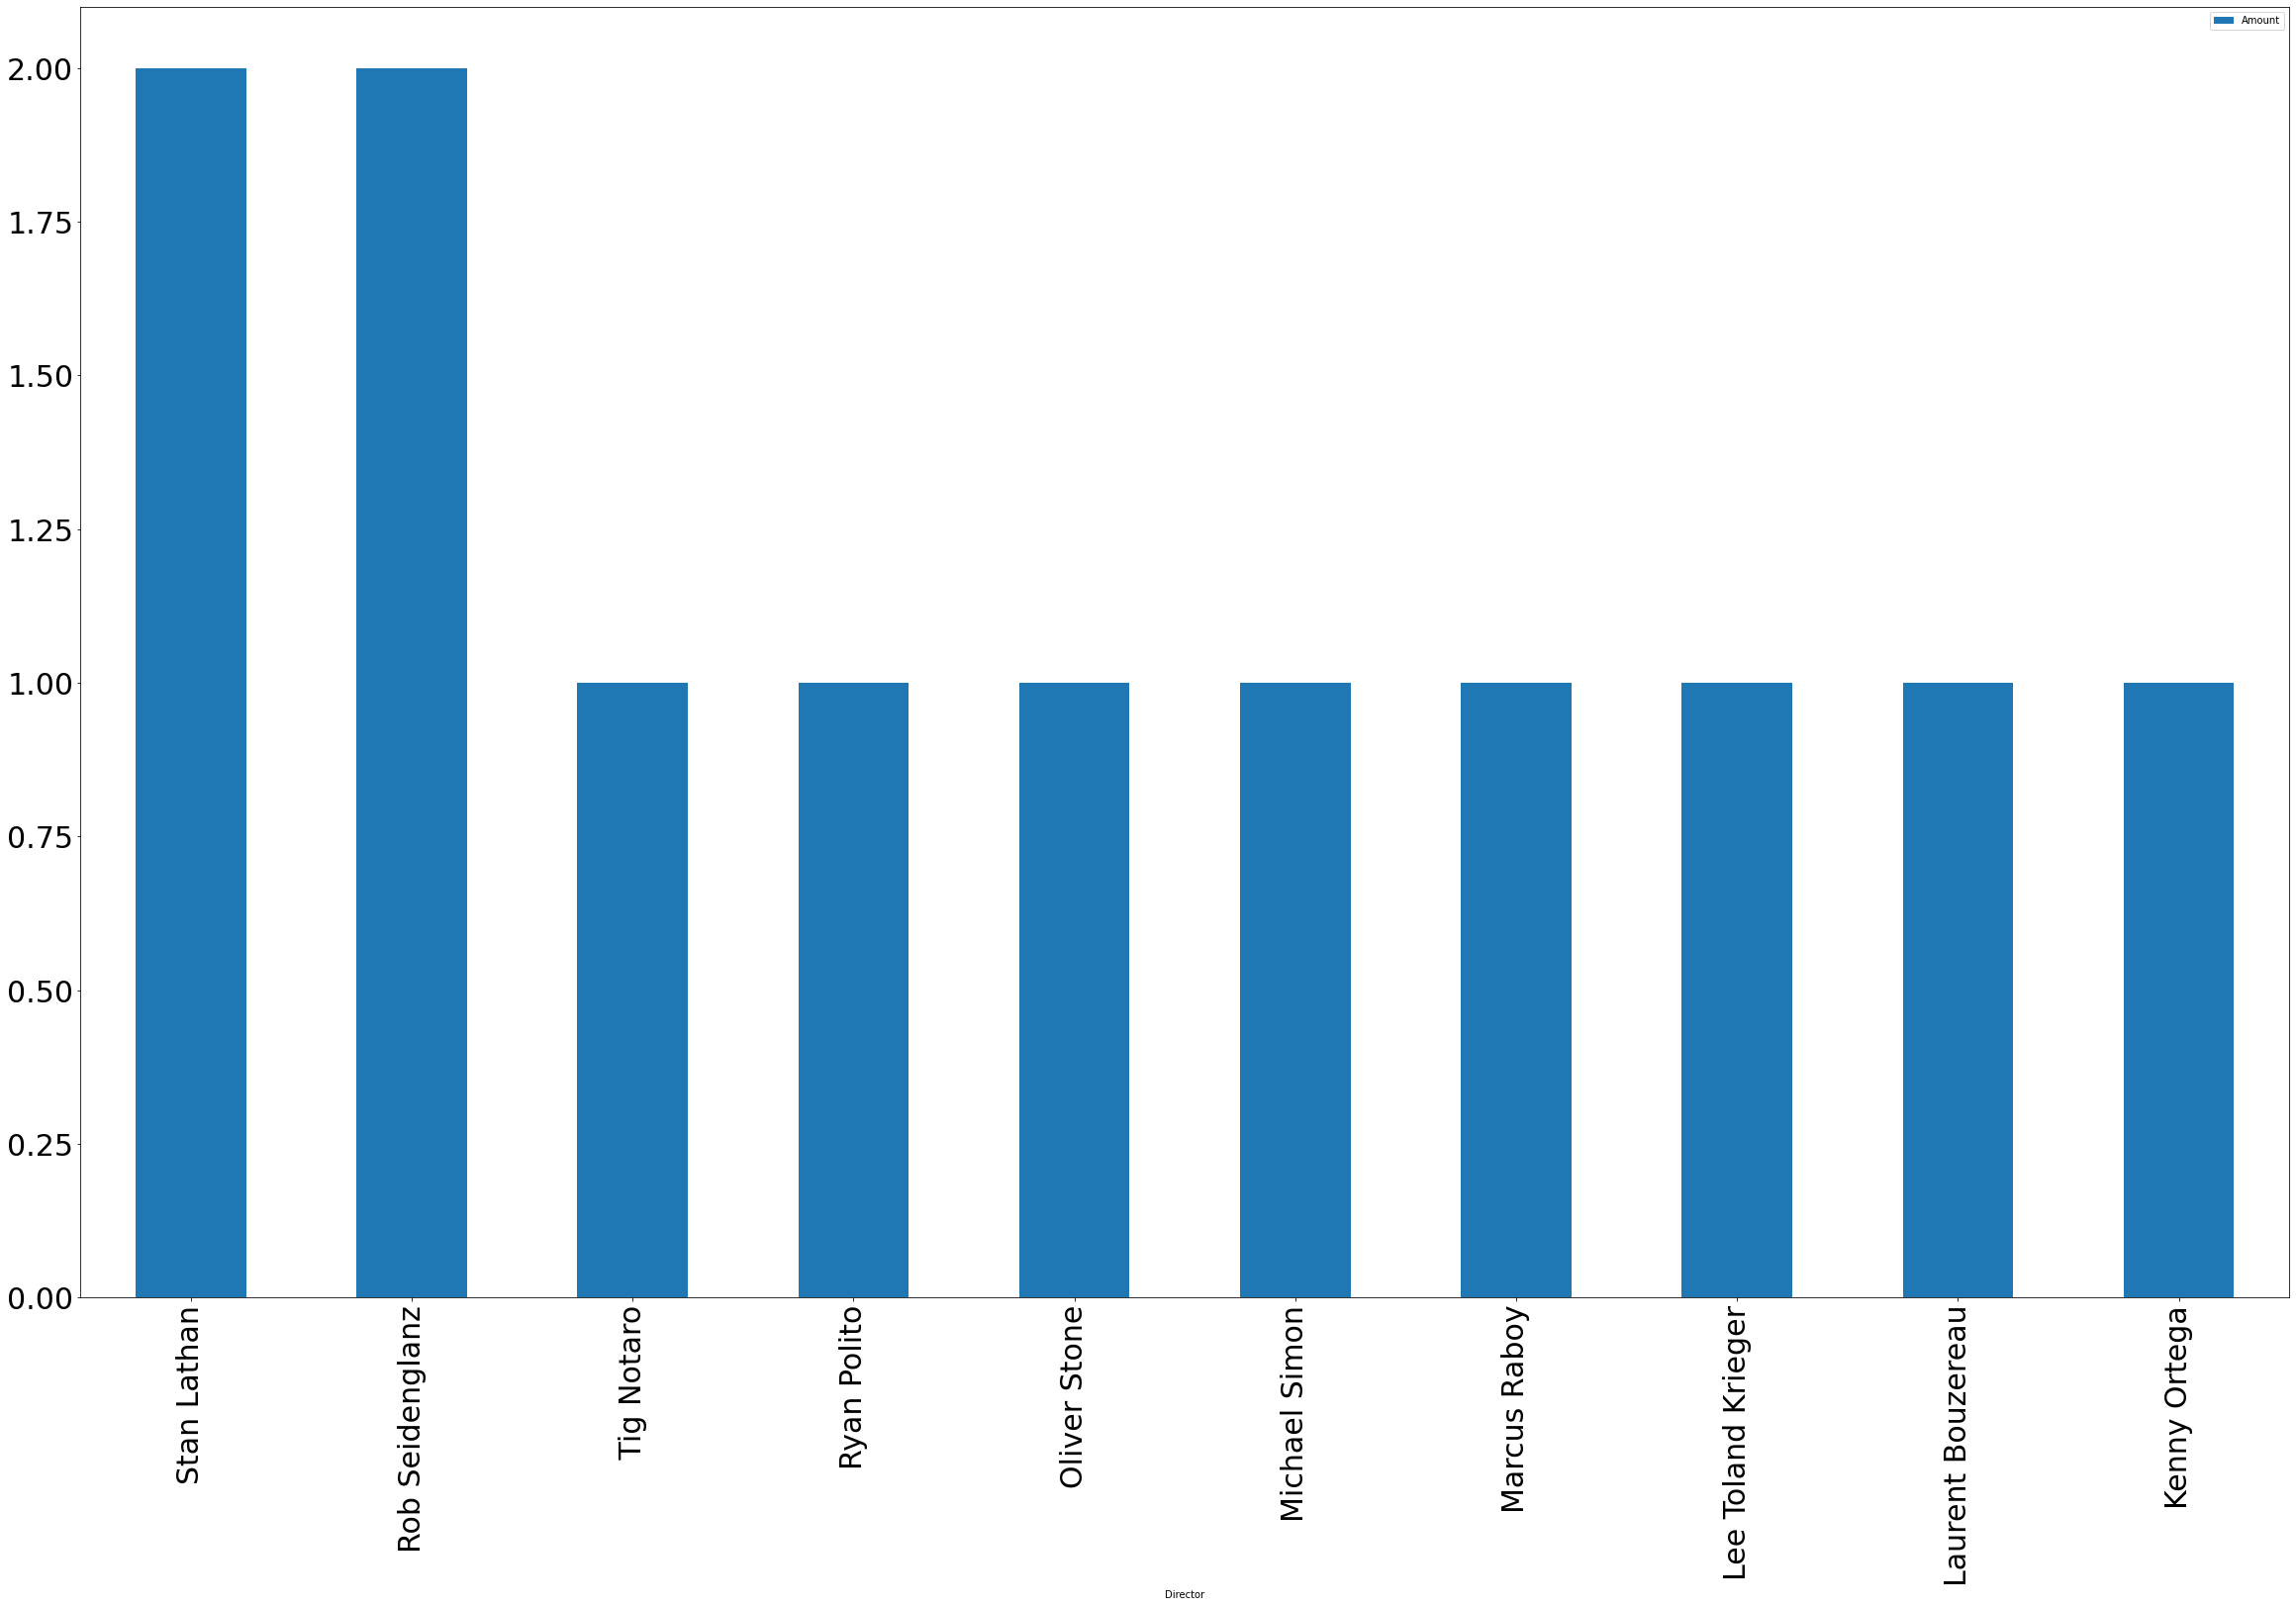

In [93]:
TV_Shows9 = df9[df9['type'] == 'TV Show']
TV_Shows9 = TV_Shows9[TV_Shows9['country'] == country9]
TV_Shows9 = TV_Shows9.reset_index()

TV_Shows9 = TV_Shows9.groupby(["director"], as_index=False).count()
TV_Shows9 = TV_Shows9[['director', 'show_id']]
TV_Shows9.columns = ['Director', 'Amount']
TV_Shows9 = TV_Shows9.reset_index()
TV_Shows9['Director'] = TV_Shows9['Director'].str.split(',')

TV_Shows9 = (TV_Shows9
 .set_index(['index','Amount'])['Director']
 .apply(pd.Series)
 .stack()
 .reset_index()
 .drop('level_2', axis=1)
 .rename(columns={0:'Director'}))

TV_Shows9 = TV_Shows9.groupby(['Director'], as_index=False).sum()
TV_Shows9 = TV_Shows9.sort_values('Amount', ascending=False)
TV_Shows9 = TV_Shows9.head(10)

TV_Shows9.plot(x ='Director', y='Amount', kind = 'bar', figsize=(40,24), fontsize=30)
plt.show()

### Ερωτημα 10

[]

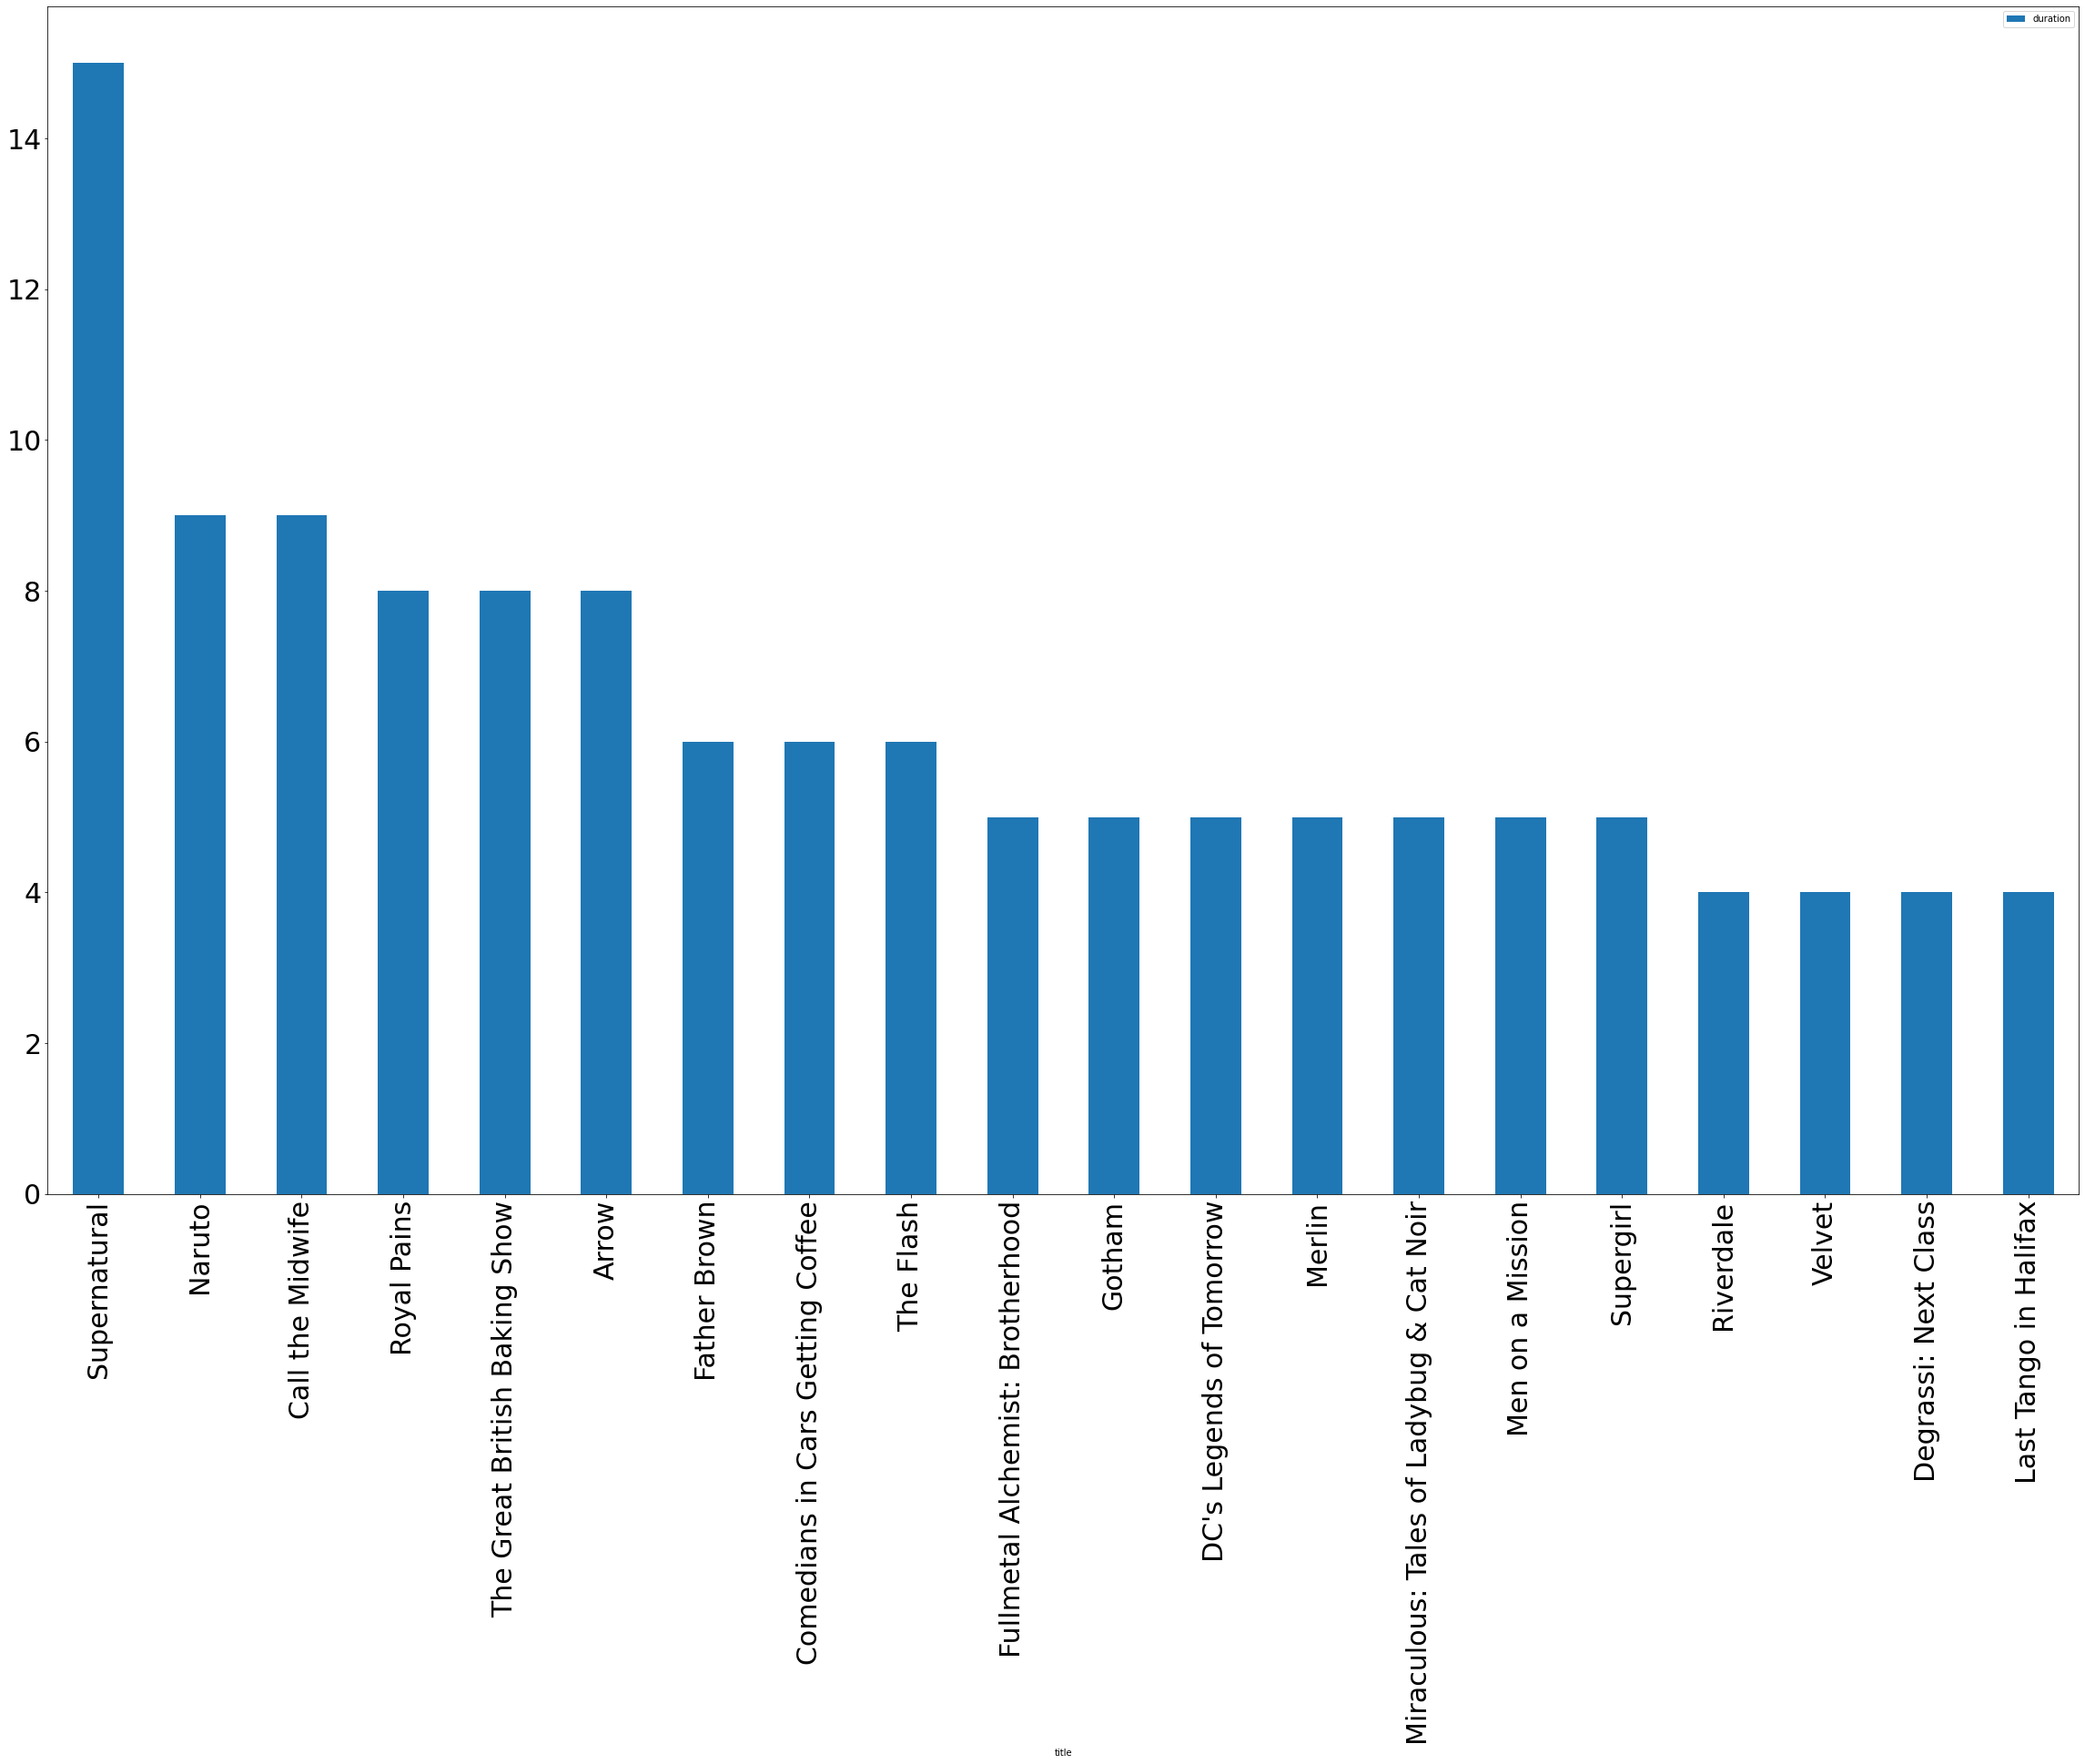

In [83]:
df10 = df.copy()
df10 = df10[df10["type"] == "TV Show"]
df10 = df10[["title", 'duration']]

def modifySeason(str):
    l = str.split()
    return int(l[0])

df10['duration'] = df10['duration'].apply(modifySeason)

df10 = df10.sort_values(by=['duration'], ascending=False)

df10 = df10.head(20)

df10.plot(x='title', y='duration', kind='bar', figsize=(40, 24), fontsize=30)
plt.plot()


### Ερωτημα 11